In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
ext = '_all_balanced'

In [4]:
subject_list = ['sub002','sub003']
subject_list = ['sub002','sub003','sub004','sub005','sub006','sub007','sub009','sub010','sub011','sub012','sub013',
                'sub014','sub015','sub016','sub017','sub018','sub020','sub021','sub022','sub023','sub024','sub025',
                'sub026','sub028']
#subject_list = ['sub002','sub003','sub004','sub005','sub006','sub007','sub009','sub010','sub011','sub012','sub013',
#                'sub006','sub016']

In [5]:
array_list = []
for subject in subject_list:
    if ext == "_response_correct" and subject == 'sub006': #sub006 has no precue vs nocue??? CHECK 
            print subject,"did not have this file"
#     elif ext == "_response_incorrect" and subject in ['sub003','sub004','sub005']:
#             print subject,"did not have this file"
    else:
        d = np.load('classification_output/'+subject+'_precue_vs_nocue'+ext+'.npy')
        array_list.append(d)#stats.zscore(d))

In [6]:
a = np.average(array_list, axis=0)
err = stats.sem(array_list, axis=0)

<Container object of 3 artists>

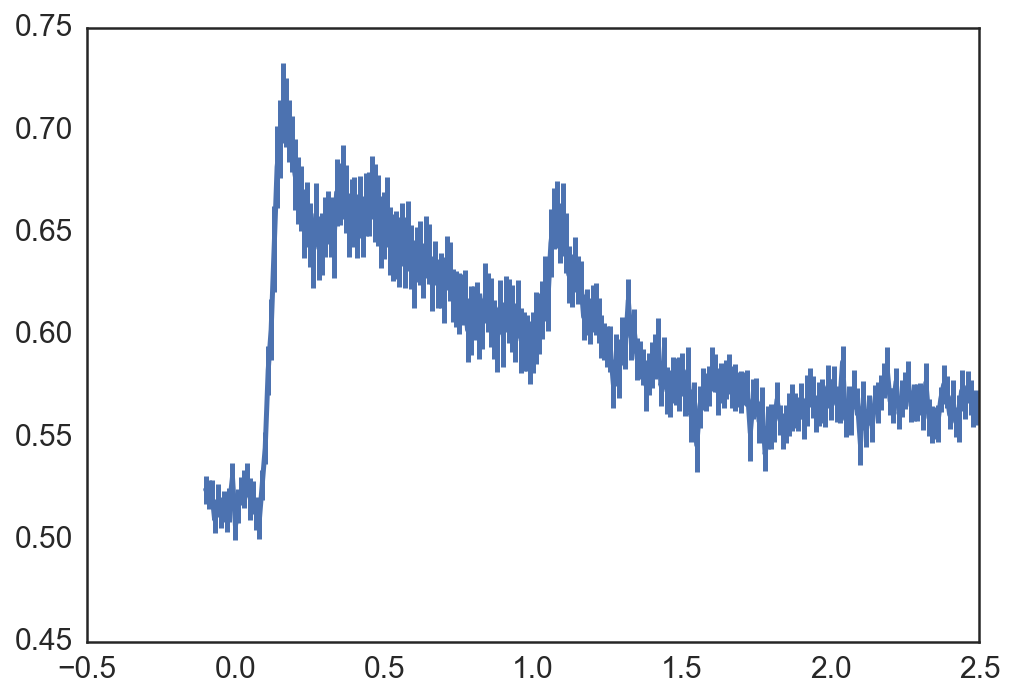

In [7]:
plt.figure()
plt.errorbar(x=np.array([item*.01 for item in range(-10,251)]),y=a.diagonal(), yerr=err.diagonal())



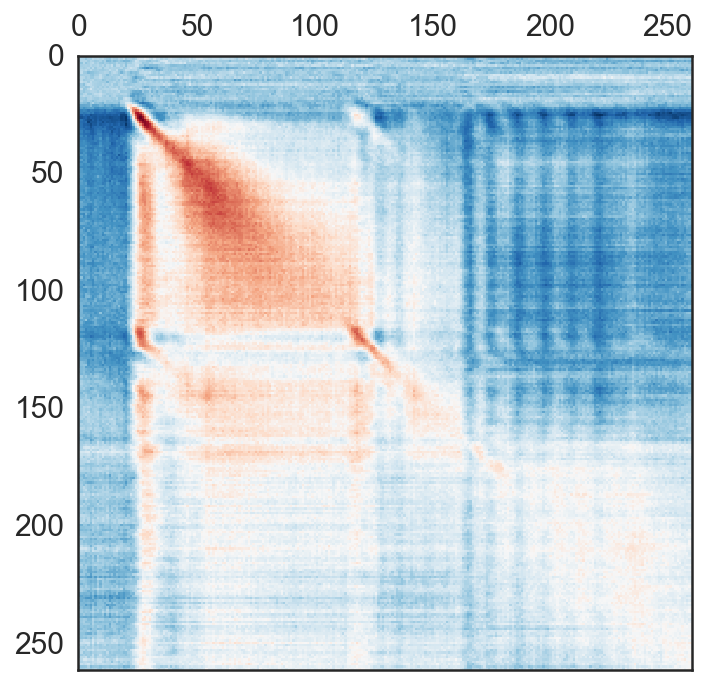

In [8]:
p = plt.matshow(a,cmap='RdBu_r')
#p.set_clim(vmin=.5, vmax=None)

In [9]:
array_list = []
for subject in subject_list:
    if ext == "_response_correct" and subject == 'sub006': #sub006 has no precue vs nocue??? CHECK 
        print subject,"did not have this file"
    elif subject == 'sub010':
        print subject,"did not have this file"
    else:
        d = np.load('classification_output/'+subject+'_postcue_vs_nocue'+ext+'.npy')
        array_list.append(d)#stats.zscore(d))

sub010 did not have this file


In [10]:
a = np.average(array_list, axis=0)
err = stats.sem(array_list, axis=0)

<Container object of 3 artists>

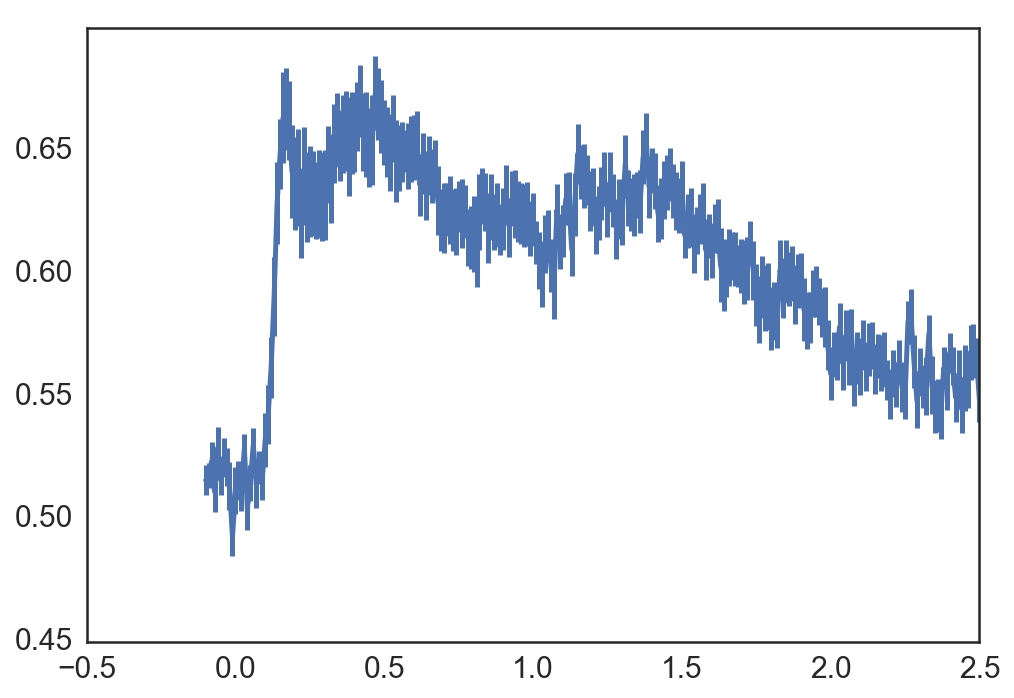

In [11]:
plt.figure()
plt.errorbar(x=np.array([item*.01 for item in range(-10,251)]),y=a.diagonal(), yerr=err.diagonal())

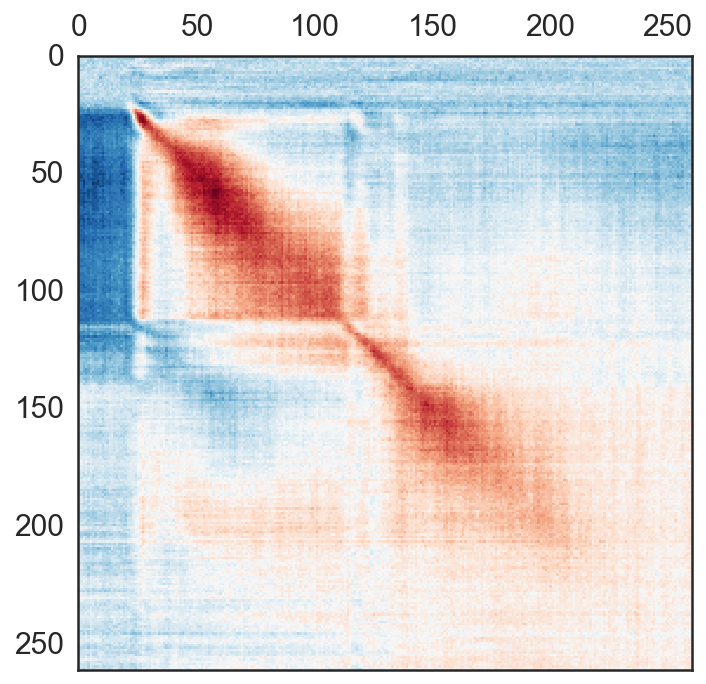

In [12]:
p = plt.matshow(a,cmap='RdBu_r')
#p.set_clim(vmin=.5, vmax=None)

In [13]:
#Target idenity overall (not broken down 
array_list = []
for subject in subject_list:
    try:
        d = np.load('classification_output/'+subject+'_target_identity'+ext+'.npy')
        array_list.append(d)#tats.zscore(d))
    except IOError:
        print subject,"does not have file"

In [14]:
a = np.average(array_list, axis=0)
err = stats.sem(array_list, axis=0)

<Container object of 3 artists>

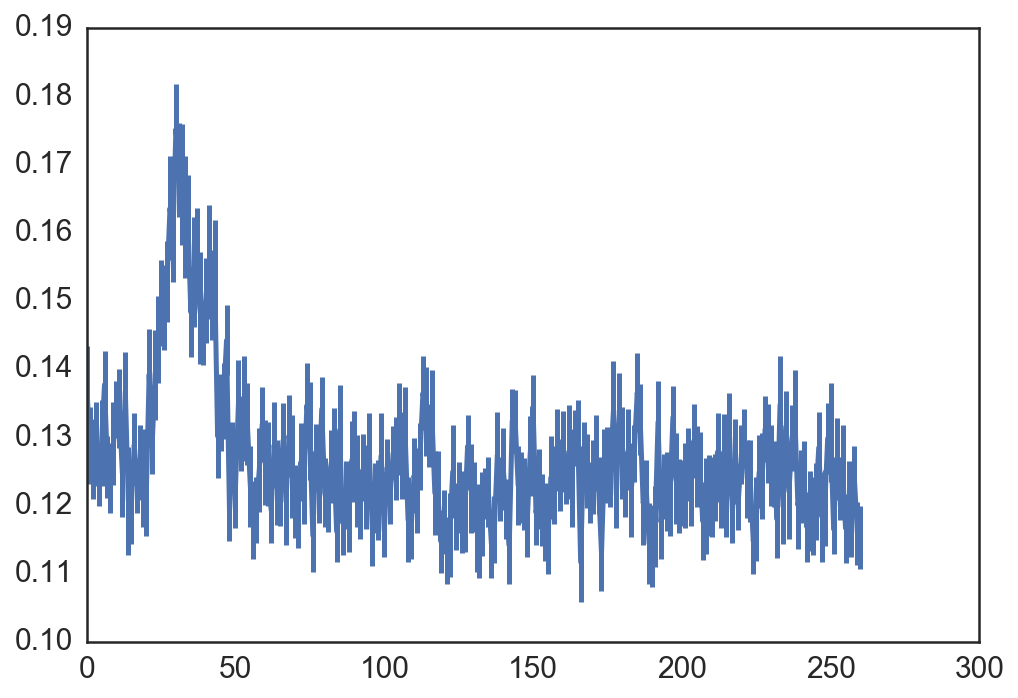

In [15]:
plt.figure()
plt.errorbar(x=np.array(range(len(a.diagonal()))),y=a.diagonal(), yerr=err.diagonal())

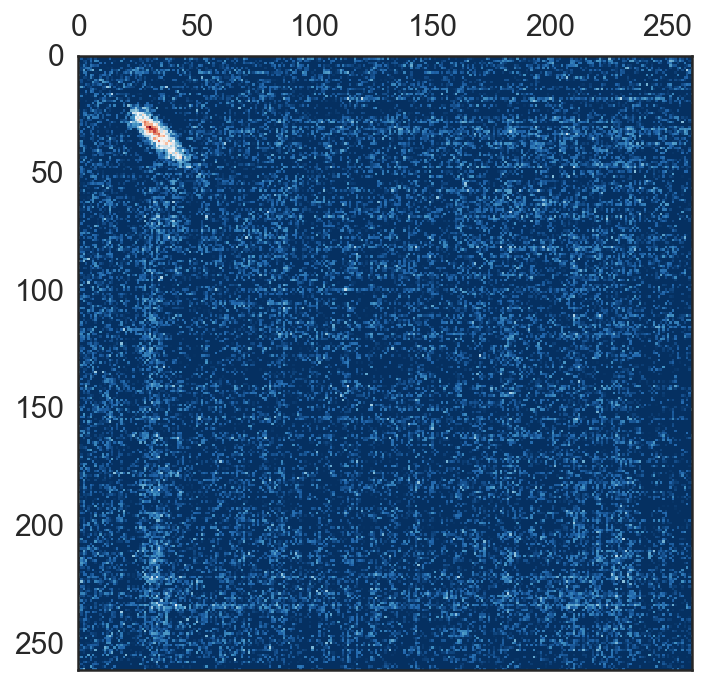

In [16]:
p = plt.matshow(a,cmap='RdBu_r')
p.set_clim(vmin=.125, vmax=None)

In [17]:
#ext = '_all'
precue_array_list = []

for subject in subject_list:
    try:
        d = np.load('classification_output/'+subject+'_precue_picture2_targ_or_not'+ext+'.npy')
        precue_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"does not have file"

In [18]:
a_precue = np.average(precue_array_list, axis=0)
err_precue = stats.sem(precue_array_list, axis=0)

<Container object of 3 artists>

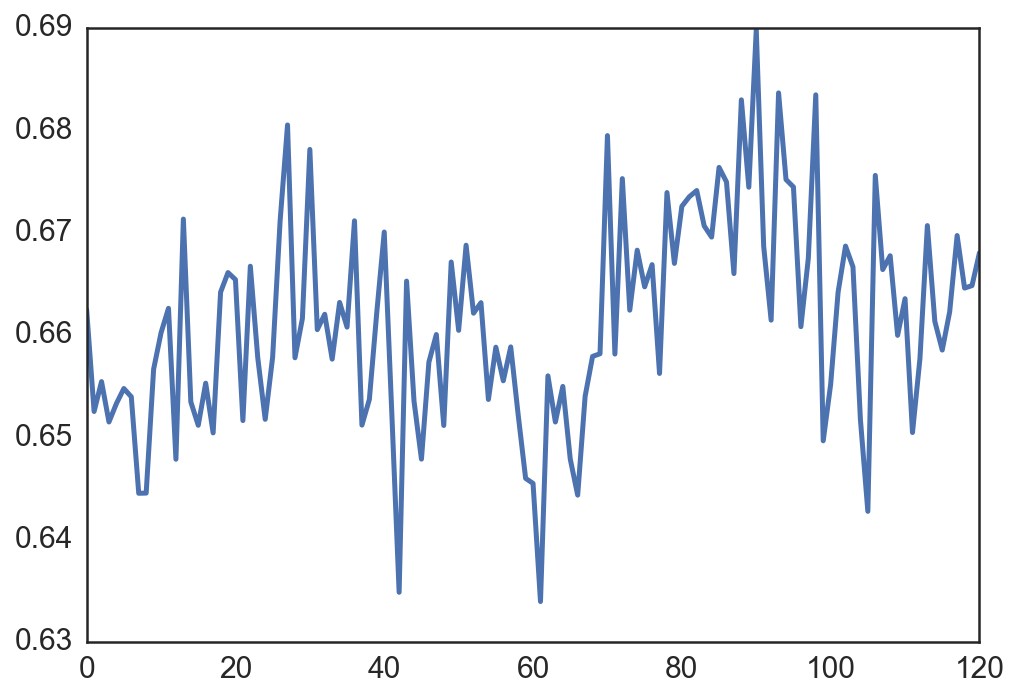

In [19]:
y_precue = a_precue.diagonal()
plt.figure()
plt.errorbar(x=np.array(range(len(y_precue))),y=y_precue)#, yerr=err.diagonal())

In [106]:
ext = '_all_balanced'
precue_array_list = []

for subject in subject_list:
    try:
        d = np.load('classification_output/'+subject+'_precue_target_id'+ext+'.npy')
        precue_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"does not have file"

In [107]:
a_precue = np.average(precue_array_list, axis=0)
err_precue = stats.sem(precue_array_list, axis=0)

<Container object of 3 artists>

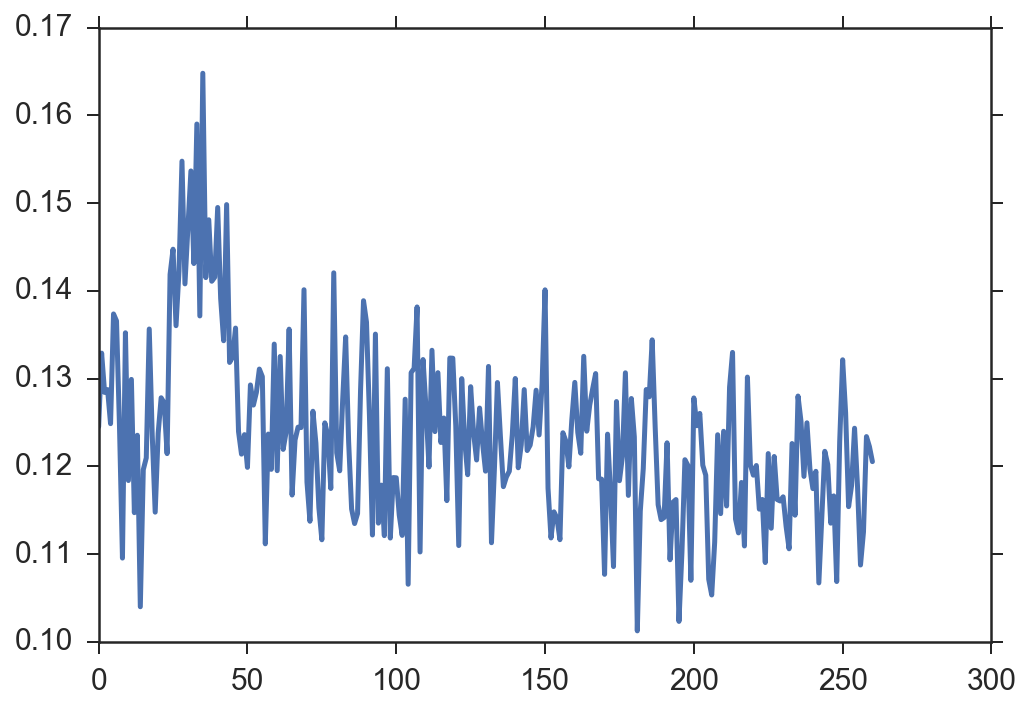

In [108]:
y_precue = a_precue.diagonal()
plt.figure()
plt.errorbar(x=np.array(range(len(y_precue))),y=y_precue)#, yerr=err.diagonal())

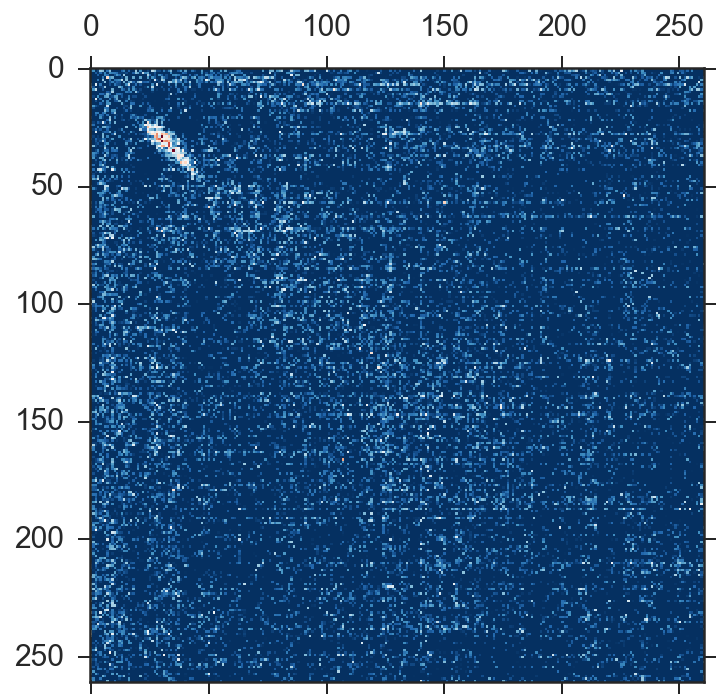

In [109]:
p = plt.matshow(a_precue,cmap='RdBu_r')
p.set_clim(vmin=.125, vmax=None)

In [110]:
noprecue_array_list = []
for subject in subject_list:
    try:
        d = np.load('classification_output/'+subject+'_noprecue_target_id'+ext+'.npy')
        #d = np.load('classification_output/'+subject+'_noprecue_target_id_onlypostcue'+ext+'.npy')


        noprecue_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"does not have file"

In [111]:
a_noprecue = np.average(noprecue_array_list, axis=0)
err_noprecue = stats.sem(noprecue_array_list, axis=0)

<Container object of 3 artists>

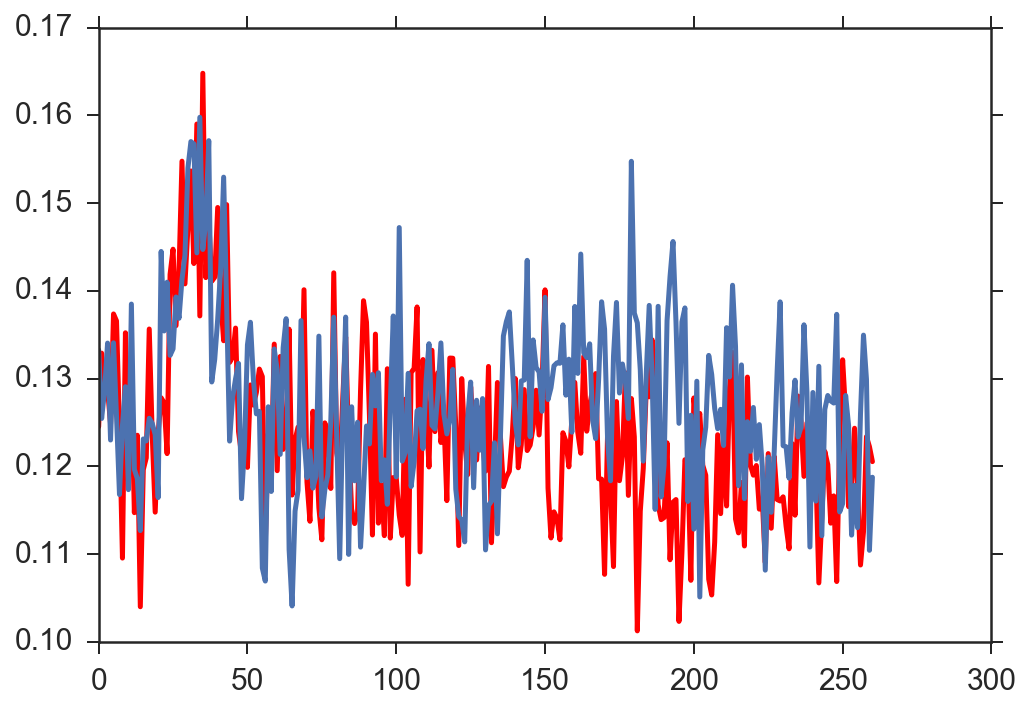

In [112]:
y_noprecue = a_noprecue.diagonal()
plt.figure()
plt.errorbar(x=np.array(range(len(y_precue))),y=y_precue, color='red')#, yerr=err_precue.diagonal())
plt.errorbar(x=np.array(range(len(y_noprecue))),y=y_noprecue)#, yerr=err_noprecue.diagonal())


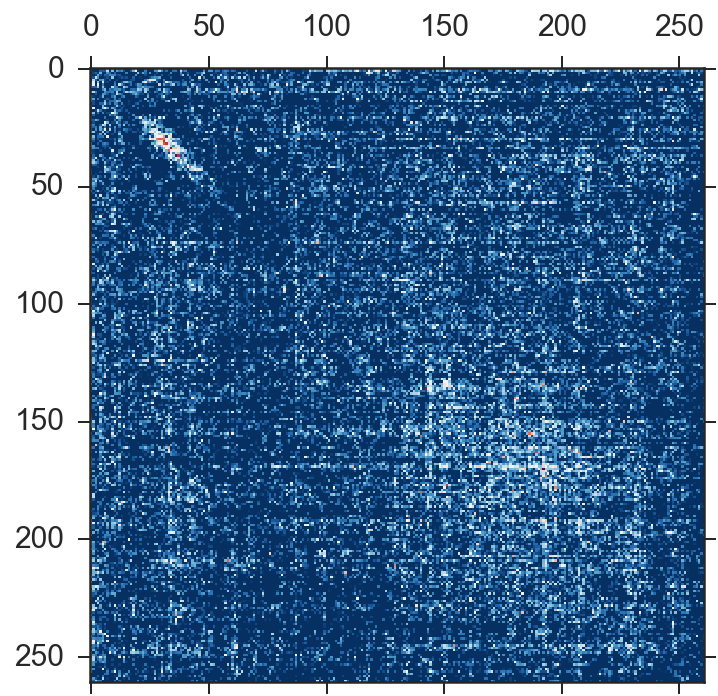

In [113]:
p = plt.matshow(a_noprecue,cmap='RdBu_r')
p.set_clim(vmin=.125, vmax=None)

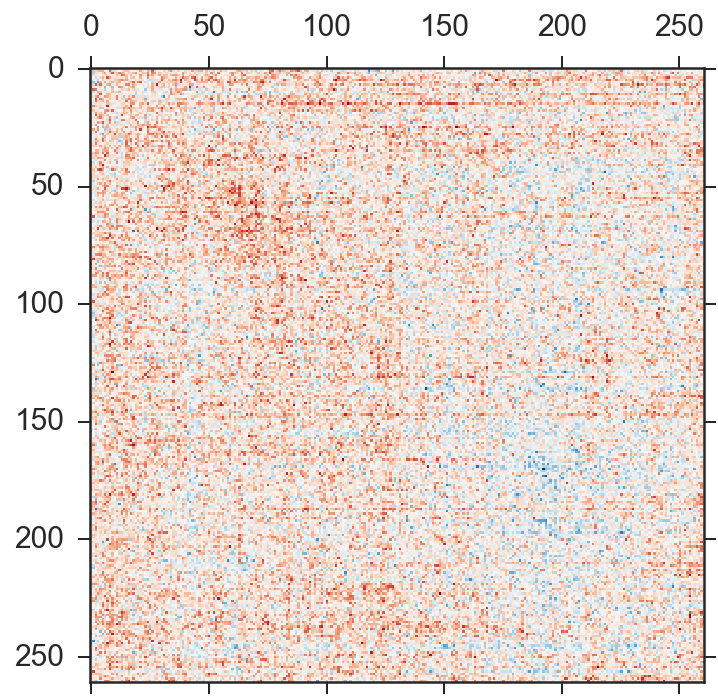

In [114]:
p = plt.matshow(a_precue-a_noprecue,cmap='RdBu_r')

In [29]:
differences = []
for timepoint in range(len(a_precue)):
    noprecue = np.array([item.diagonal()[timepoint] for item in noprecue_array_list])
    precue = np.array([item.diagonal()[timepoint] for item in precue_array_list])
    difference = precue-noprecue
    differences.append(difference)
    
    output = stats.ttest_rel(noprecue,precue)
    if 0< timepoint < 50:
        print timepoint, output.pvalue

1 0.526591028249
2 0.984941273689
3 0.654059261432
4 0.873812389596
5 0.77837736499
6 0.420363280325
7 0.440745473521
8 0.125965359849
9 0.570121599627
10 0.901078662051
11 0.476446330314
12 0.627386661707
13 0.642556549628
14 0.29807667334
15 0.812565926542
16 0.856724375558
17 0.513658571112
18 0.918795426894
19 0.34751589472
20 0.600994508005
21 0.18883640384
22 0.484605276314
23 0.0925463235427
24 0.465085947012
25 0.27510784764
26 0.776746209391
27 0.65908448893
28 0.337187743185
29 0.776658076872
30 0.512991673781
31 0.785909774649
32 0.355023619487
33 0.0918165588871
34 0.0812617355147
35 0.163672595621
36 0.591743733095
37 0.563822737517
38 0.362543235637
39 0.362275472199
40 0.318329198051
41 0.777525560577
42 0.0913148601721
43 0.420929613531
44 0.439913393517
45 0.684759581033
46 0.643564178004
47 0.487147751023
48 0.747876530109
49 0.912885761455


In [30]:
#differences

In [31]:
a = np.average(differences, axis=1)
err = stats.sem(differences, axis=1)

<Container object of 3 artists>

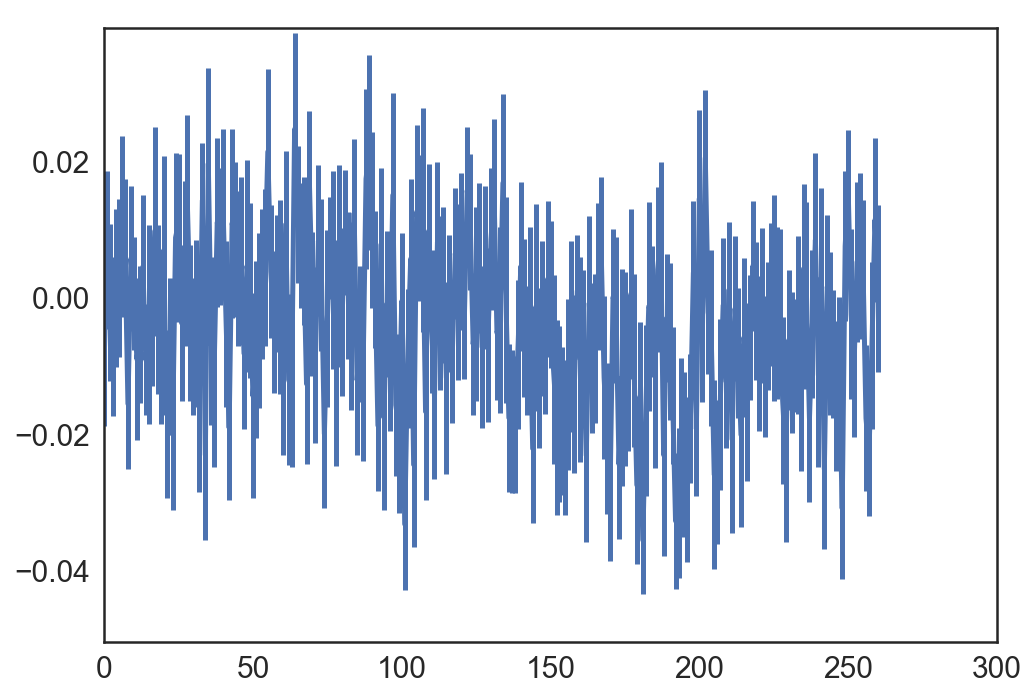

In [32]:
plt.figure()
plt.errorbar(x=np.array(range(len(a))),y=a, yerr=err)

In [33]:
#Target idenity overall (not broken down 
precue_id_array_list = []
for subject in subject_list:
    if ext == "_response_incorrect" and subject in ['sub002']:
        print subject,"did not have this file"
    else:
        d = np.load('classification_output/'+subject+'_precue_id'+ext+'.npy')
        precue_id_array_list.append(d)

In [34]:
a = np.average(precue_id_array_list, axis=0)
err = stats.sem(precue_id_array_list, axis=0)

<Container object of 3 artists>

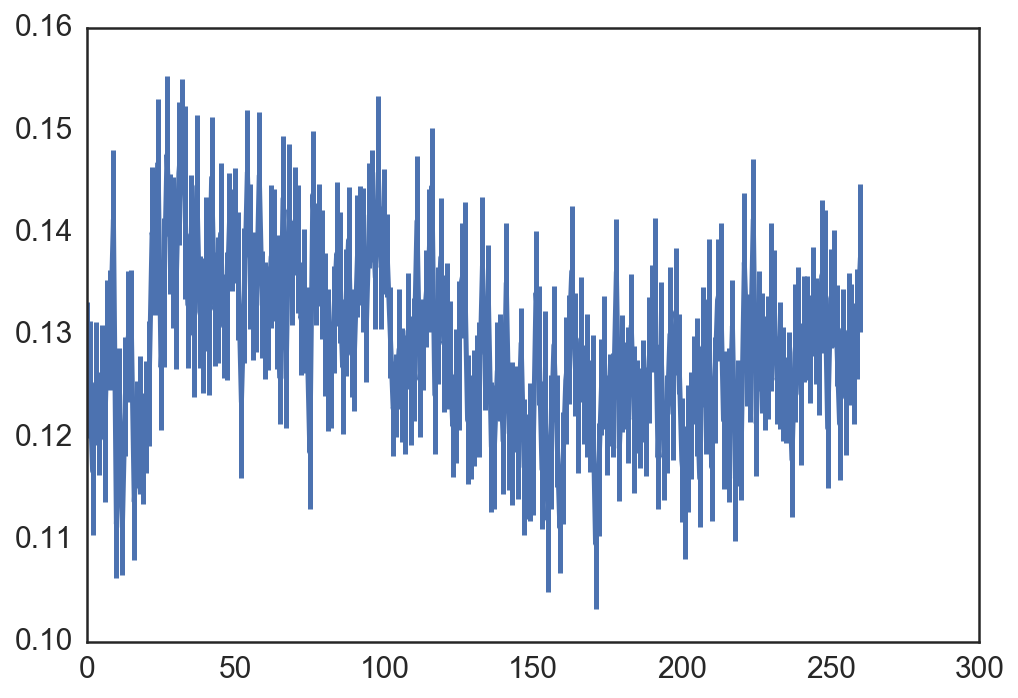

In [35]:
y_precue_id = a.diagonal()
plt.figure()
plt.errorbar(x=np.array(range(len(a.diagonal()))),y=y_precue_id, yerr=err.diagonal())

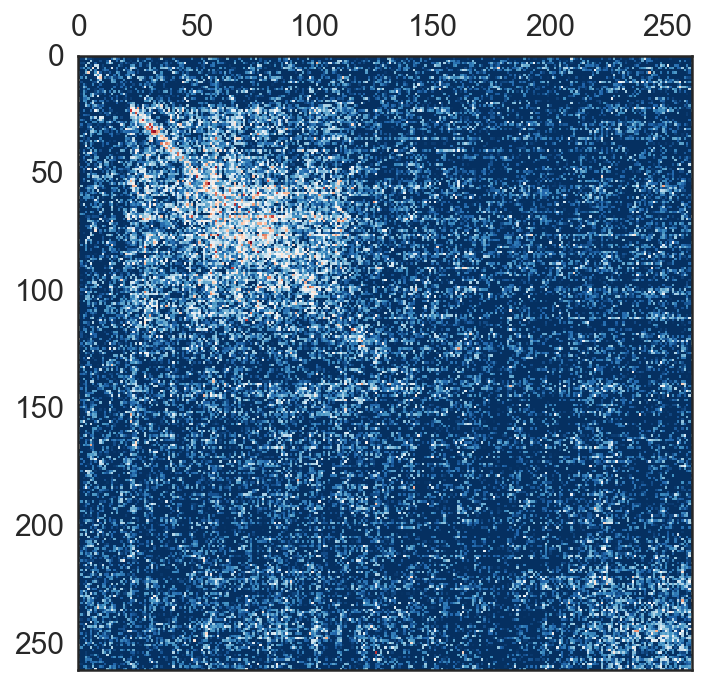

In [36]:
p = plt.matshow(a,cmap='RdBu_r')
p.set_clim(vmin=.125, vmax=None)


In [37]:
#Target idenity overall (not broken down 
target_cat_array_list = []
for subject in subject_list:
    if ext == "_response_incorrect" and subject in ['sub002']:
        print subject,"did not have this file"
    else:
        d = np.load('classification_output/'+subject+'_target_category'+ext+'.npy')
        target_cat_array_list.append(d)

In [38]:
a = np.average(target_cat_array_list, axis=0)
err = stats.sem(target_cat_array_list, axis=0)

<Container object of 3 artists>

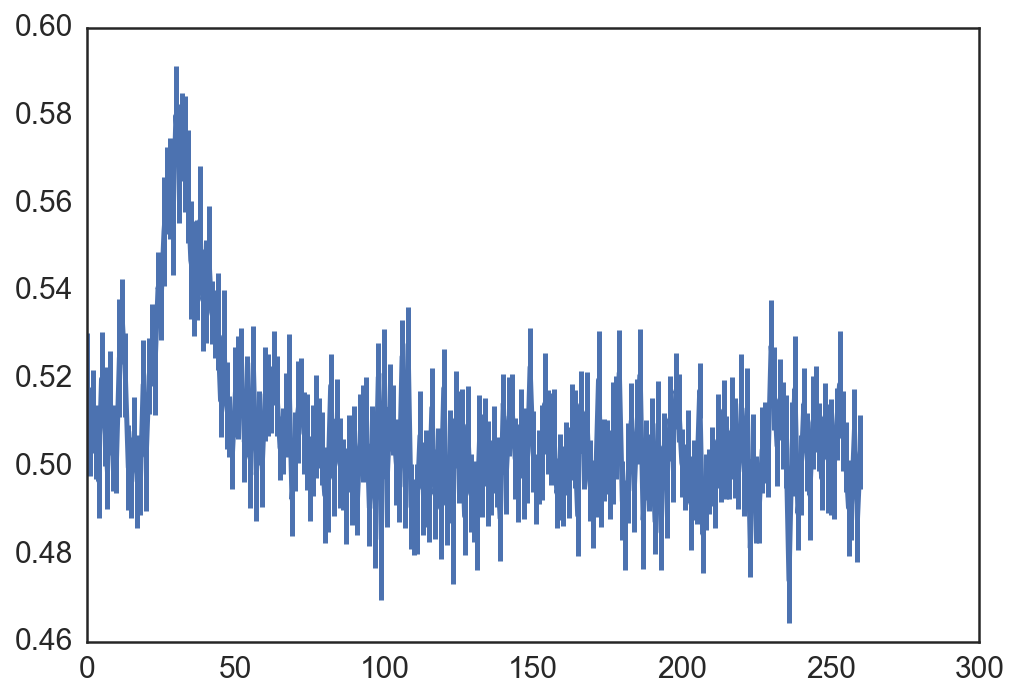

In [39]:
y = a.diagonal()
plt.figure()
plt.errorbar(x=np.array(range(len(a.diagonal()))),y=y, yerr=err.diagonal())

In [40]:
#Target idenity overall (not broken down 
precue_array_list = []
for subject in subject_list:
    if ext == "_response_incorrect" and subject in ['sub002']:
        print subject,"did not have this file"
    else:
        d = np.load('classification_output/'+subject+'_precue_target_cat'+ext+'.npy')
        precue_array_list.append(d)

In [41]:
a_precue = np.average(precue_array_list, axis=0)
err = stats.sem(precue_array_list, axis=0)

<Container object of 3 artists>

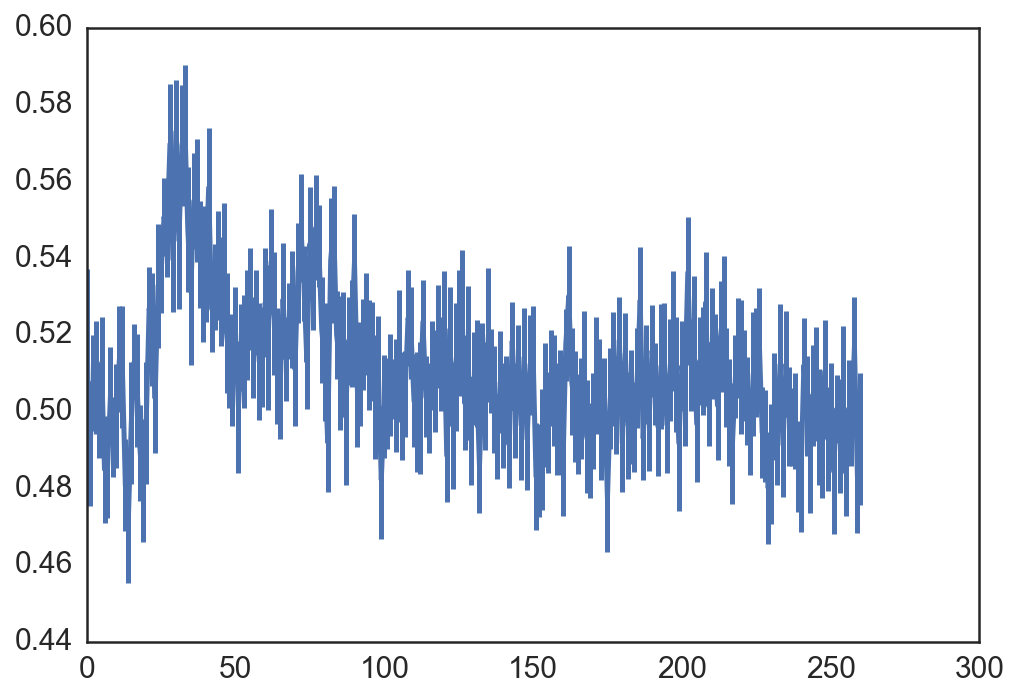

In [42]:
y_precue_cat = a_precue.diagonal()
plt.figure()
plt.errorbar(x=np.array(range(len(a_precue.diagonal()))),y=y_precue_cat, yerr=err.diagonal())

In [43]:
#Target idenity overall (not broken down 
noprecue_array_list = []
for subject in subject_list:
    if ext == "_response_incorrect" and subject in ['sub002']:
        print subject,"did not have this file"
    else:
        d = np.load('classification_output/'+subject+'_noprecue_target_cat'+ext+'.npy')
        noprecue_array_list.append(d)

In [44]:
a_noprecue = np.average(noprecue_array_list, axis=0)
err = stats.sem(noprecue_array_list, axis=0)

<Container object of 3 artists>

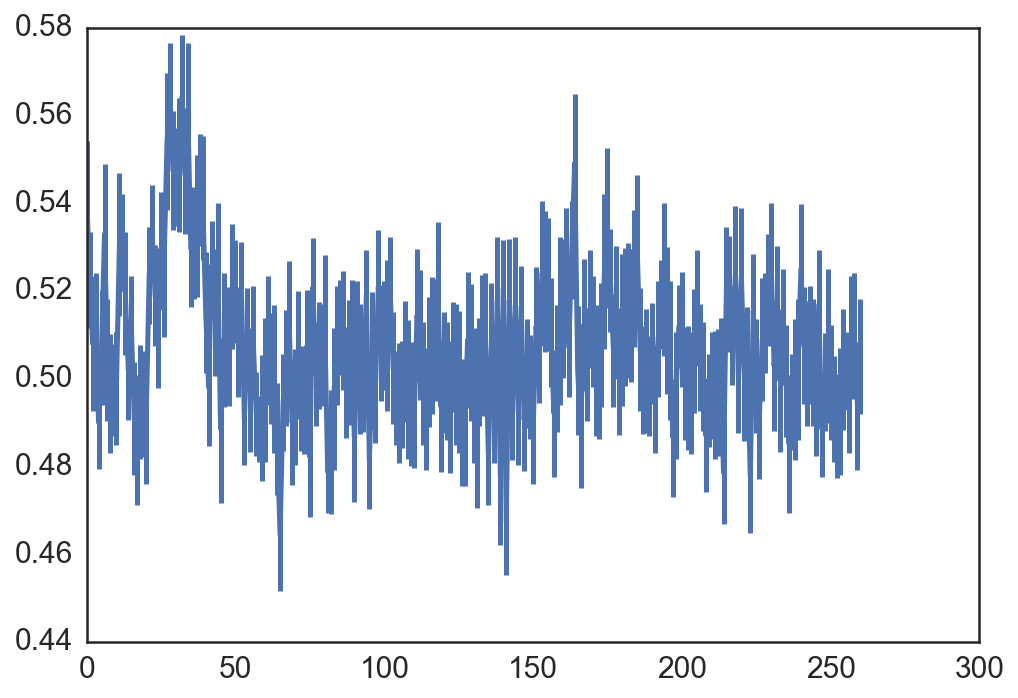

In [45]:
y_noprecue_cat = a_noprecue.diagonal()
plt.figure()
plt.errorbar(x=np.array(range(len(a_noprecue.diagonal()))),y=y_noprecue_cat, yerr=err.diagonal())

In [46]:
differences = []
for timepoint in range(len(a_noprecue)):
    noprecue = np.array([item.diagonal()[timepoint] for item in noprecue_array_list])
    precue = np.array([item.diagonal()[timepoint] for item in precue_array_list])
    difference = precue-noprecue
    differences.append(difference)
    
    output = stats.ttest_rel(noprecue,precue)
    if 50< timepoint < 100:
        print timepoint, output.pvalue

51 0.702621719675
52 0.825355604998
53 0.13471219846
54 0.454129882362
55 0.108585826456
56 0.616204163079
57 0.010377881117
58 0.159826754503
59 0.279912369942
60 0.166716590983
61 0.655829097668
62 0.0220300230335
63 0.254822830303
64 0.146339304981
65 0.0500175137268
66 0.0701490234328
67 0.539424654278
68 0.63734943764
69 0.0576729926508
70 0.348297601973
71 0.163157798119
72 0.0117653813483
73 0.0183942831232
74 0.718897960638
75 0.0110572391415
76 0.487779957595
77 0.0430767939846
78 0.0361346018196
79 0.471630686624
80 0.981575067166
81 0.494649884248
82 0.0192179860214
83 0.0242727941013
84 0.546082419678
85 0.964053195206
86 0.730144387977
87 0.985448634753
88 0.475023310358
89 0.512563666738
90 0.00389224460714
91 0.823089682483
92 0.645046454148
93 0.407833069789
94 0.826636003853
95 0.0982846143575
96 0.613473188346
97 0.745409565253
98 0.618209983932
99 0.182698487403


In [47]:
a = np.average(differences, axis=1)
err = stats.sem(differences, axis=1)

<Container object of 3 artists>

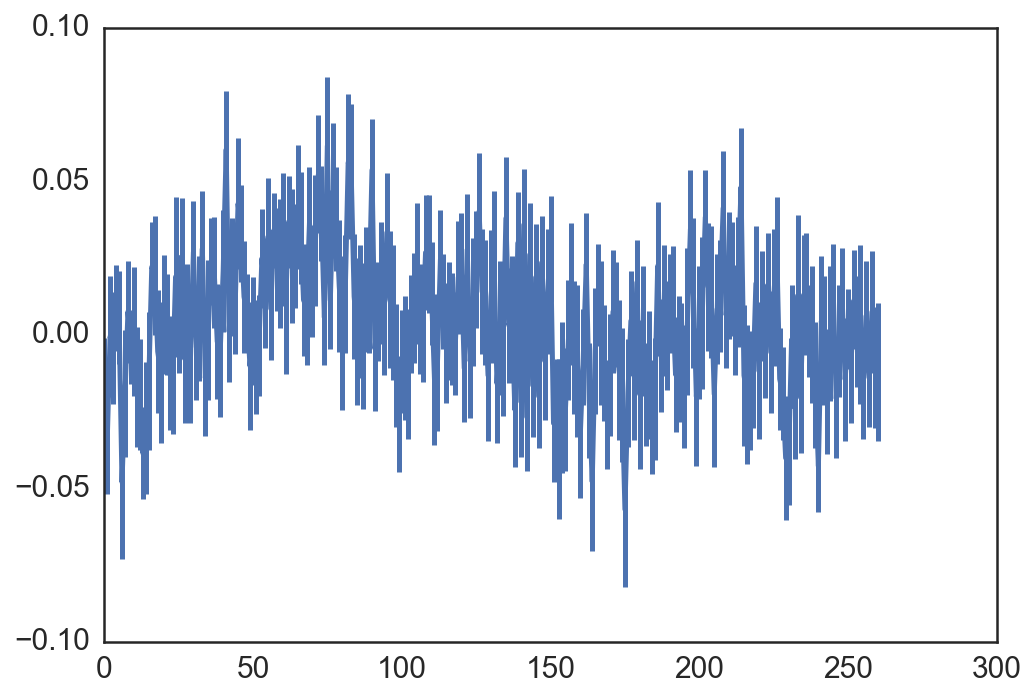

In [48]:
plt.figure()
plt.errorbar(x=np.array(range(len(a))),y=a, yerr=err)

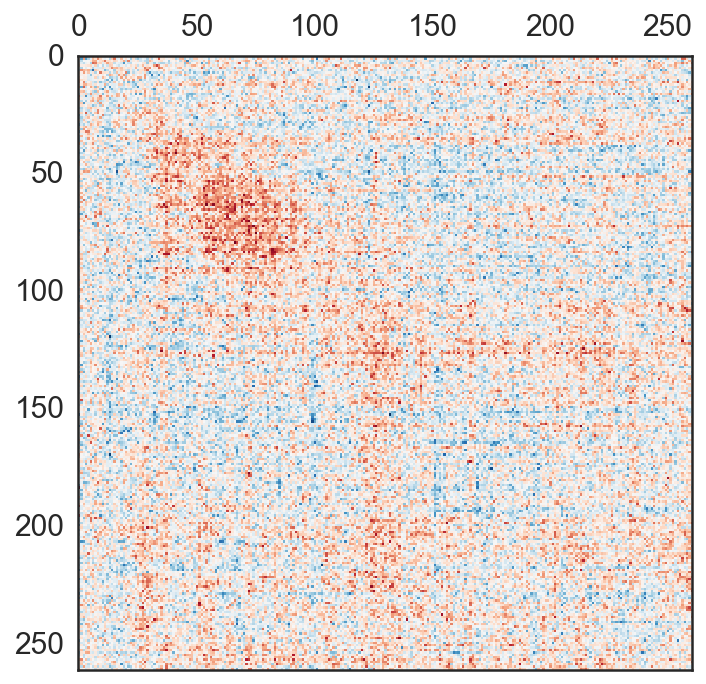

In [49]:
p = plt.matshow(a_precue-a_noprecue,cmap='RdBu_r')
#p.set_clim(vmin=.125, vmax=None)


In [50]:
precue_pic2_array_list = []
precue_pic3_array_list = []
precue_pic4_array_list = []
precue_pic5_array_list = []


for subject in subject_list:

    try:
        d = np.load('classification_output/'+subject+'_precue_picture2_targ_or_not'+ext+'.npy')
        precue_pic2_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_precue_picture3_targ_or_not'+ext+'.npy')
        precue_pic3_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_precue_picture4_targ_or_not'+ext+'.npy')
        precue_pic4_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_precue_picture5_targ_or_not'+ext+'.npy')
        precue_pic5_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    

In [51]:
a_pic2 = np.average(precue_pic2_array_list, axis=0)
err_pic2 = stats.sem(precue_pic2_array_list, axis=0)
a_pic3 = np.average(precue_pic3_array_list, axis=0)
err_pic3 = stats.sem(precue_pic3_array_list, axis=0)
a_pic4 = np.average(precue_pic4_array_list, axis=0)
err_pic4 = stats.sem(precue_pic4_array_list, axis=0)
a_pic5 = np.average(precue_pic5_array_list, axis=0)
err_pic5 = stats.sem(precue_pic5_array_list, axis=0)

<Container object of 3 artists>

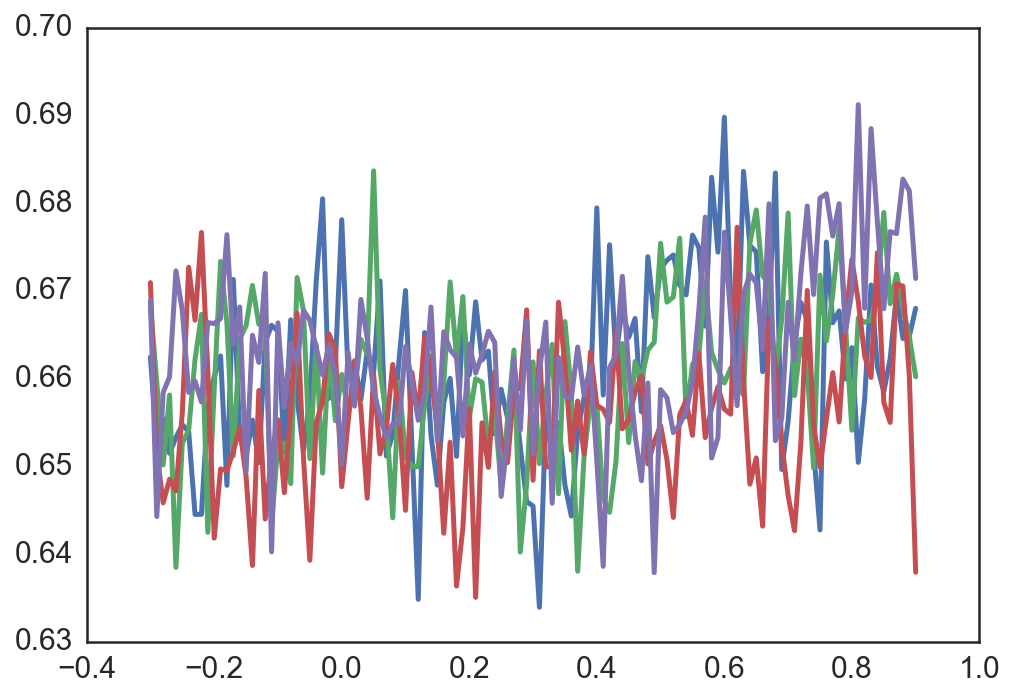

In [52]:
y_precue_pic2 = a_pic2.diagonal()
y_precue_pic3 = a_pic3.diagonal()
y_precue_pic4 = a_pic4.diagonal()
y_precue_pic5 = a_pic5.diagonal()

plt.figure()
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_precue_pic2)#, yerr=err_pic2.diagonal())
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_precue_pic3)#, yerr=err_pic3.diagonal())
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_precue_pic4)#, yerr=err_pic3.diagonal())
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_precue_pic5)#, yerr=err_pic3.diagonal())





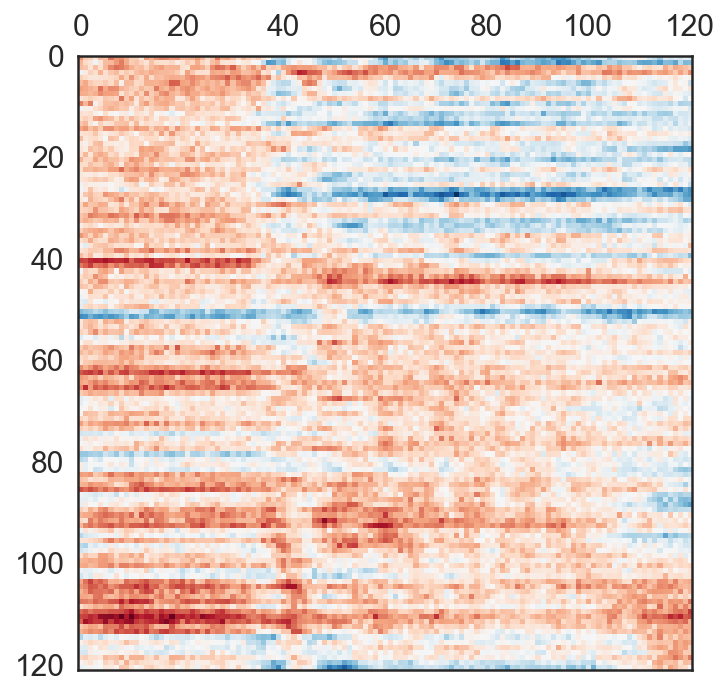

In [53]:
p = plt.matshow(a_pic4,cmap='RdBu_r')



In [54]:
noprecue_pic2_array_list = []
noprecue_pic3_array_list = []
noprecue_pic4_array_list = []
noprecue_pic5_array_list = []


for subject in subject_list:

    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture2_targ_or_not'+ext+'.npy')
        noprecue_pic2_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture3_targ_or_not'+ext+'.npy')
        noprecue_pic3_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture4_targ_or_not'+ext+'.npy')
        noprecue_pic4_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture5_targ_or_not'+ext+'.npy')
        noprecue_pic5_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    

In [55]:
a_pic2 = np.average(noprecue_pic2_array_list, axis=0)
err_pic2 = stats.sem(noprecue_pic2_array_list, axis=0)
a_pic3 = np.average(noprecue_pic3_array_list, axis=0)
err_pic3 = stats.sem(noprecue_pic3_array_list, axis=0)
a_pic4 = np.average(noprecue_pic4_array_list, axis=0)
err_pic4 = stats.sem(noprecue_pic4_array_list, axis=0)
a_pic5 = np.average(noprecue_pic5_array_list, axis=0)
err_pic5 = stats.sem(noprecue_pic5_array_list, axis=0)

<Container object of 3 artists>

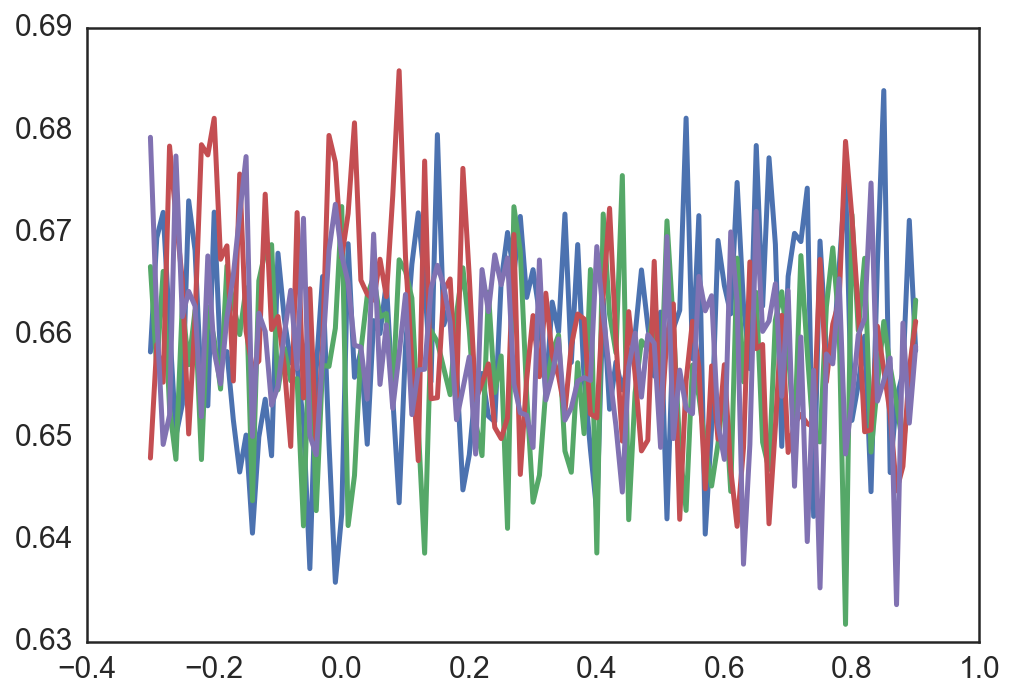

In [56]:
y_noprecue_pic2 = a_pic2.diagonal()
y_noprecue_pic3 = a_pic3.diagonal()
y_noprecue_pic4 = a_pic4.diagonal()
y_noprecue_pic5 = a_pic5.diagonal()

plt.figure()
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_noprecue_pic2)#, yerr=err_pic2.diagonal())
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_noprecue_pic3)#, yerr=err_pic3.diagonal())
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_noprecue_pic4)#, yerr=err_pic3.diagonal())
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_noprecue_pic5)#, yerr=err_pic3.diagonal())





<Container object of 3 artists>

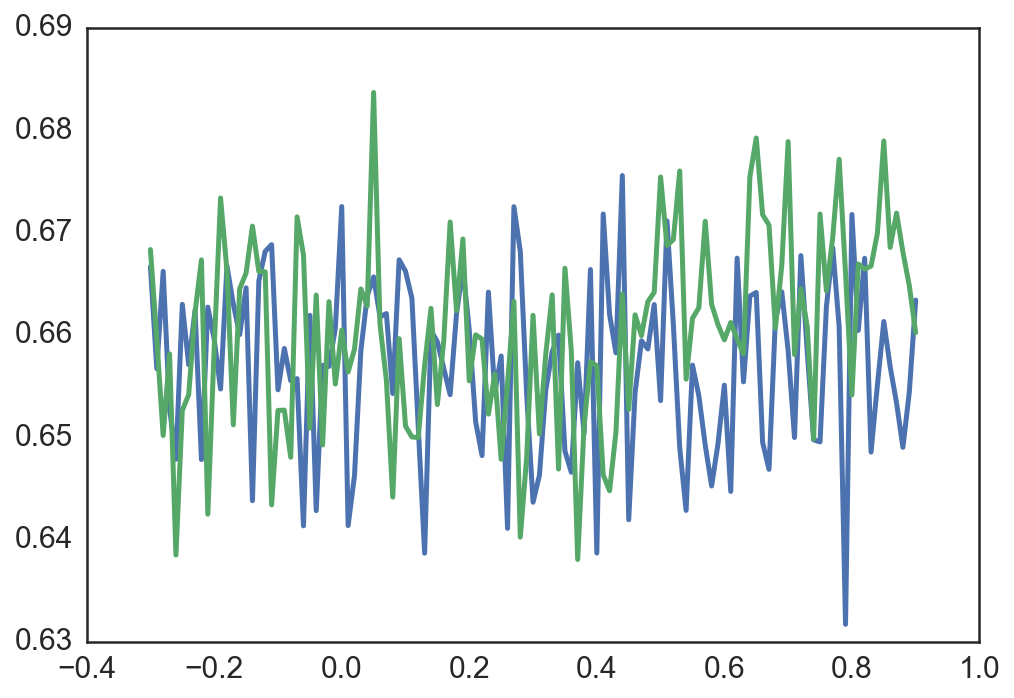

In [57]:
plt.figure()
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_noprecue_pic3)#, yerr=err_pic2.diagonal())
plt.errorbar(x=np.array([item*.01 for item in range(-30,91)]),y=y_precue_pic3)#, yerr=err_pic2.diagonal())




In [58]:
before = 4
after =  4

#when done for each individual subject
precue_pic2 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic2_array_list])
precue_pic3 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic3_array_list])
precue_pic4 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic4_array_list])
precue_pic5 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic5_array_list])

#when done for best timepoint across subjects
precue_pic2 = np.array([item.diagonal()[y_precue_pic2.argmax()-before:y_precue_pic2.argmax()+after].mean() for item in precue_pic2_array_list])
precue_pic3 = np.array([item.diagonal()[y_precue_pic3.argmax()-before:y_precue_pic3.argmax()+after].mean() for item in precue_pic3_array_list])
precue_pic4 = np.array([item.diagonal()[y_precue_pic4.argmax()-before:y_precue_pic4.argmax()+after].mean() for item in precue_pic4_array_list])
precue_pic5 = np.array([item.diagonal()[y_precue_pic5.argmax()-before:y_precue_pic5.argmax()+after].mean() for item in precue_pic5_array_list])

precue_pic2_interval = np.array([item.diagonal()[y_precue_pic2.argmax()-before:y_precue_pic2.argmax()+after] for item in precue_pic2_array_list])
precue_pic3_interval = np.array([item.diagonal()[y_precue_pic3.argmax()-before:y_precue_pic3.argmax()+after] for item in precue_pic3_array_list])
precue_pic4_interval = np.array([item.diagonal()[y_precue_pic4.argmax()-before:y_precue_pic4.argmax()+after] for item in precue_pic4_array_list])
precue_pic5_interval = np.array([item.diagonal()[y_precue_pic5.argmax()-before:y_precue_pic5.argmax()+after] for item in precue_pic5_array_list])



#when done for each individual subject
noprecue_pic2 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic2_array_list])
noprecue_pic3 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic3_array_list])
noprecue_pic4 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic4_array_list])
noprecue_pic5 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic5_array_list])

#when done for best timepoint across subjects
noprecue_pic2 = np.array([item.diagonal()[y_noprecue_pic2.argmax()-before:y_noprecue_pic2.argmax()+after].mean() for item in noprecue_pic2_array_list])
noprecue_pic3 = np.array([item.diagonal()[y_noprecue_pic3.argmax()-before:y_noprecue_pic3.argmax()+after].mean() for item in noprecue_pic3_array_list])
noprecue_pic4 = np.array([item.diagonal()[y_noprecue_pic4.argmax()-before:y_noprecue_pic4.argmax()+after].mean() for item in noprecue_pic4_array_list])
noprecue_pic5 = np.array([item.diagonal()[y_noprecue_pic5.argmax()-before:y_noprecue_pic5.argmax()+after].mean() for item in noprecue_pic5_array_list])

noprecue_pic2_interval = np.array([item.diagonal()[y_noprecue_pic2.argmax()-before:y_noprecue_pic2.argmax()+after] for item in noprecue_pic2_array_list])
noprecue_pic3_interval = np.array([item.diagonal()[y_noprecue_pic3.argmax()-before:y_noprecue_pic3.argmax()+after] for item in noprecue_pic3_array_list])
noprecue_pic4_interval = np.array([item.diagonal()[y_noprecue_pic4.argmax()-before:y_noprecue_pic4.argmax()+after] for item in noprecue_pic4_array_list])
noprecue_pic5_interval = np.array([item.diagonal()[y_noprecue_pic5.argmax()-before:y_noprecue_pic5.argmax()+after] for item in noprecue_pic5_array_list])








/home/predatt/emiwar/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [59]:
precue_pic2_interval.shape

(24, 8)

In [60]:
precue_allpics = np.mean([precue_pic2,precue_pic3,precue_pic4,precue_pic5],axis=0) #average across pictures so you have number per subject
noprecue_allpics = np.mean([noprecue_pic2,noprecue_pic3,noprecue_pic4,noprecue_pic5],axis=0)

#average across pictures so you have interval persubject
precue_allpics_interval = np.mean([precue_pic2_interval,precue_pic3_interval,precue_pic4_interval,precue_pic5_interval],axis=0)
noprecue_allpics_interval = np.mean([noprecue_pic2_interval,noprecue_pic3_interval,noprecue_pic4_interval,noprecue_pic5_interval],axis=0)

ValueError: could not broadcast input array from shape (24,8) into shape (24)

In [61]:
precue_pic1_array_list = []
precue_pic2_array_list = []
precue_pic3_array_list = []
precue_pic4_array_list = []
precue_pic5_array_list = []
precue_pic6_array_list = []

subject_list_indiv = ['sub018','sub020']


for subject in subject_list:
    try:
        d = np.load('classification_output/'+subject+'_precue_picture1'+ext+'.npy')
        precue_pic1_array_list.append(d)#stats.zscore(d))
    except IOError: #sub010 has no first image
        print subject,"has not file"
        pass

    try:
        d = np.load('classification_output/'+subject+'_precue_picture2'+ext+'.npy')
        precue_pic2_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_precue_picture3'+ext+'.npy')
        precue_pic3_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_precue_picture4'+ext+'.npy')
        precue_pic4_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_precue_picture5'+ext+'.npy')
        precue_pic5_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_precue_picture6'+ext+'.npy')
        precue_pic6_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass

sub002 has not file
sub002 has not file
sub002 has not file
sub002 has not file
sub002 has not file
sub002 has not file
sub010 has not file


In [62]:
a_pic1 = np.average(precue_pic1_array_list, axis=0)
err_pic1 = stats.sem(precue_pic1_array_list, axis=0)
a_pic2 = np.average(precue_pic2_array_list, axis=0)
err_pic2 = stats.sem(precue_pic2_array_list, axis=0)
a_pic3 = np.average(precue_pic3_array_list, axis=0)
err_pic3 = stats.sem(precue_pic3_array_list, axis=0)
a_pic4 = np.average(precue_pic4_array_list, axis=0)
err_pic4 = stats.sem(precue_pic4_array_list, axis=0)
a_pic5 = np.average(precue_pic5_array_list, axis=0)
err_pic5 = stats.sem(precue_pic5_array_list, axis=0)
a_pic6 = np.average(precue_pic6_array_list, axis=0)
err_pic6 = stats.sem(precue_pic6_array_list, axis=0)

<Container object of 3 artists>

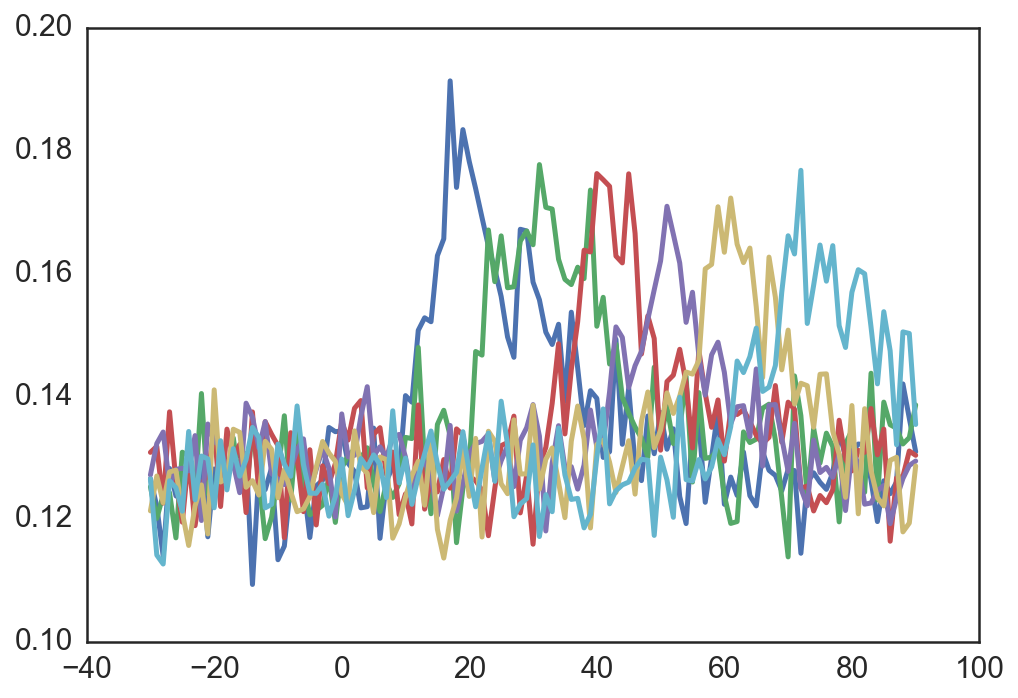

In [63]:
y_precue_pic1 = a_pic1.diagonal()
y_precue_pic2 = a_pic2.diagonal()
y_precue_pic3 = a_pic3.diagonal()
y_precue_pic4 = a_pic4.diagonal()
y_precue_pic5 = a_pic5.diagonal()
y_precue_pic6 = a_pic6.diagonal()



plt.figure()
plt.errorbar(x=np.array(range(-30,91)),y=y_precue_pic1)#, yerr=err_pic1.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_precue_pic2)#, yerr=err_pic2.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_precue_pic3)#, yerr=err_pic3.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_precue_pic4)#, yerr=err_pic3.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_precue_pic5)#, yerr=err_pic3.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_precue_pic6)#, yerr=err_pic3.diagonal())






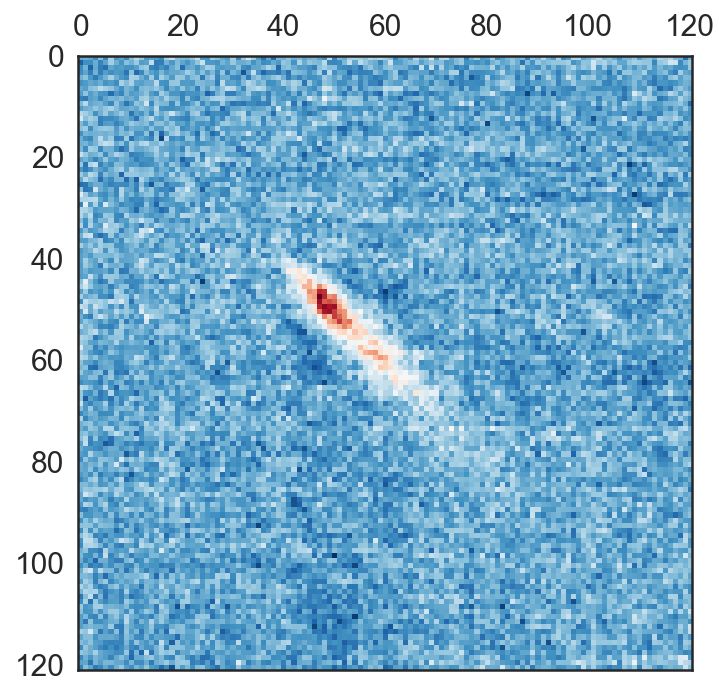

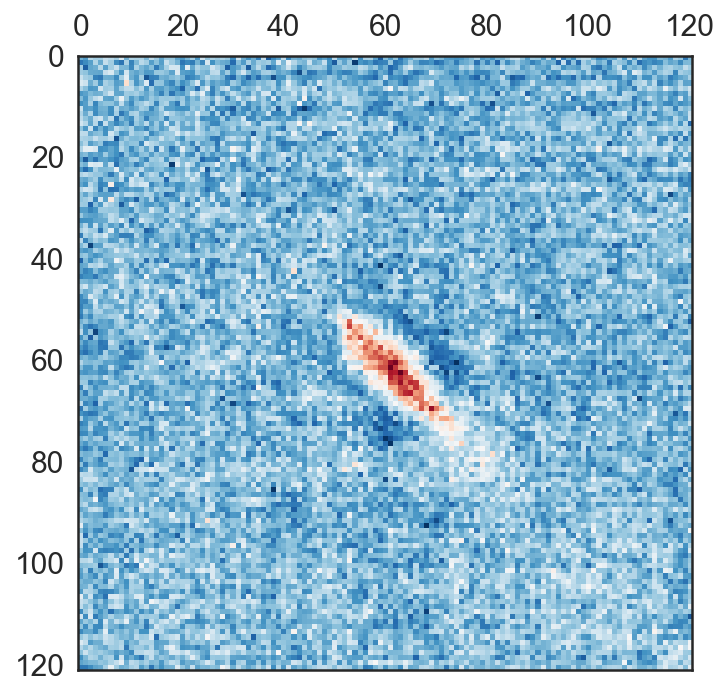

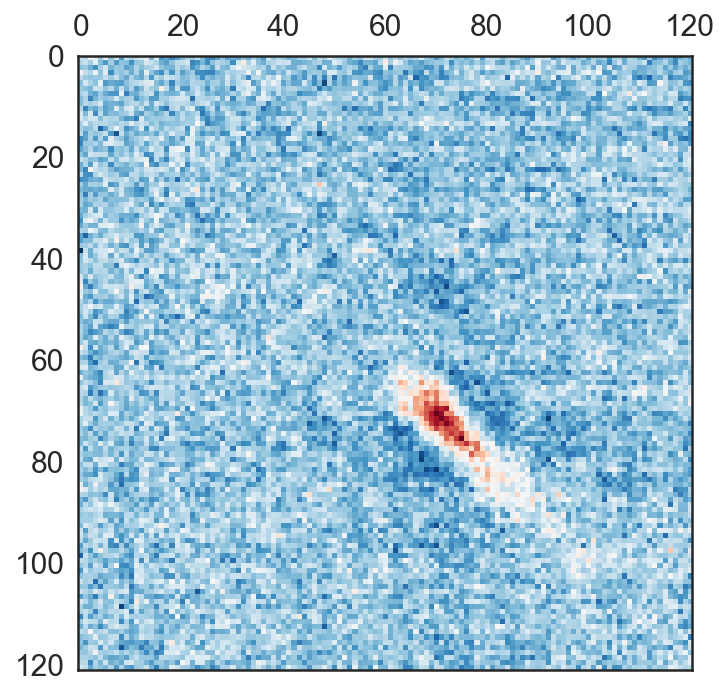

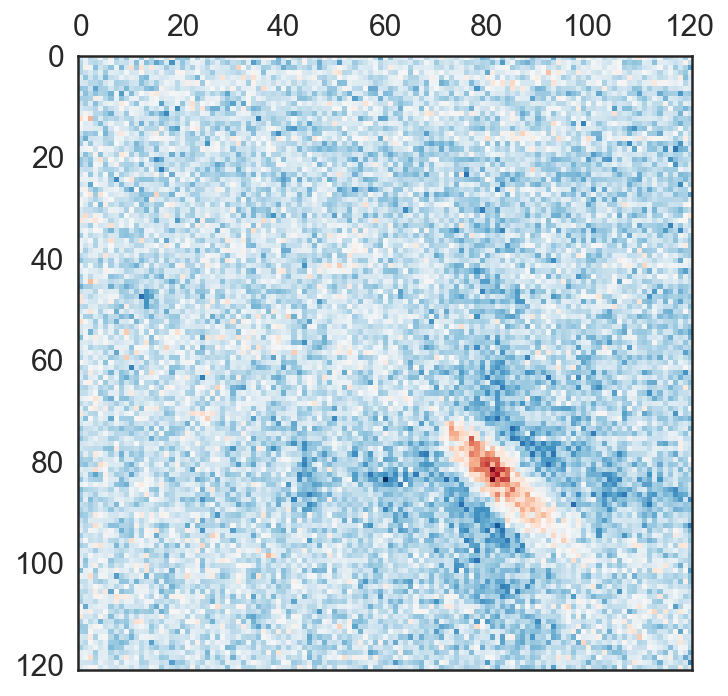

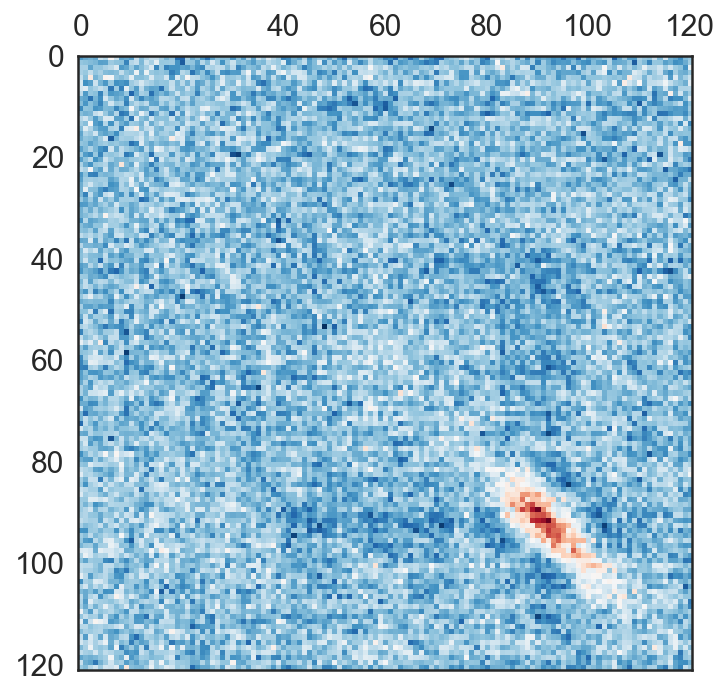

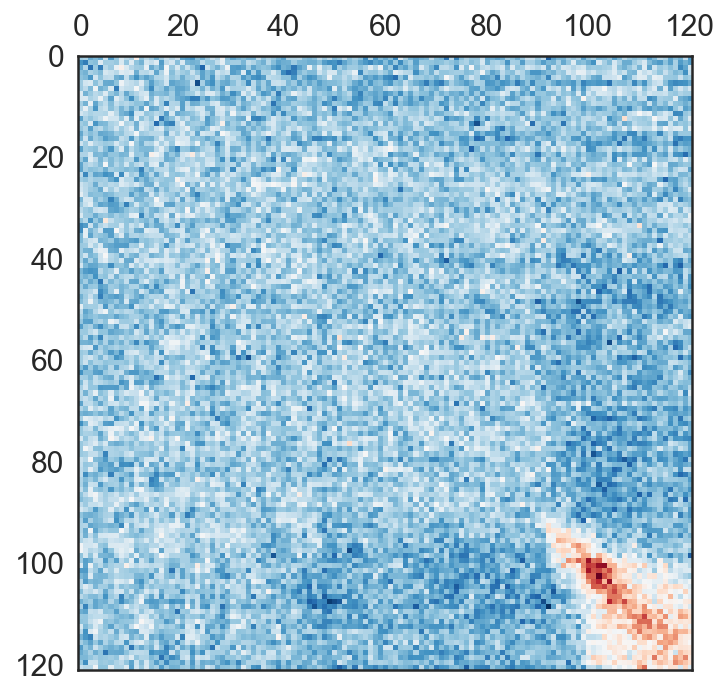

In [64]:

p = plt.matshow(a_pic1,cmap='RdBu_r')
p = plt.matshow(a_pic2,cmap='RdBu_r')
p = plt.matshow(a_pic3,cmap='RdBu_r')
p = plt.matshow(a_pic4,cmap='RdBu_r')
p = plt.matshow(a_pic5,cmap='RdBu_r')
p = plt.matshow(a_pic6,cmap='RdBu_r')
#p.set_clim(vmin=.125, vmax=None)

In [65]:
noprecue_pic1_array_list = []
noprecue_pic2_array_list = []
noprecue_pic3_array_list = []
noprecue_pic4_array_list = []
noprecue_pic5_array_list = []
noprecue_pic6_array_list = []

for subject in subject_list:
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture1'+ext+'.npy')
        noprecue_pic1_array_list.append(d)#stats.zscore(d))
    except IOError: #sub010 has no first image
        print subject,"has not file"
        pass
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture2'+ext+'.npy')
        noprecue_pic2_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture3'+ext+'.npy')
        noprecue_pic3_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture4'+ext+'.npy')
        noprecue_pic4_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture5'+ext+'.npy')
        noprecue_pic5_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass
    
    try:
        d = np.load('classification_output/'+subject+'_noprecue_picture6'+ext+'.npy')
        noprecue_pic6_array_list.append(d)#stats.zscore(d))
    except IOError:
        print subject,"has not file"
        pass

sub002 has not file
sub002 has not file
sub002 has not file
sub002 has not file
sub002 has not file
sub002 has not file
sub010 has not file


In [66]:
a_pic1 = np.average(noprecue_pic1_array_list, axis=0)
err_pic1 = stats.sem(noprecue_pic1_array_list, axis=0)
a_pic2 = np.average(noprecue_pic2_array_list, axis=0)
err_pic2 = stats.sem(noprecue_pic2_array_list, axis=0)
a_pic3 = np.average(noprecue_pic3_array_list, axis=0)
err_pic3 = stats.sem(noprecue_pic3_array_list, axis=0)
a_pic4 = np.average(noprecue_pic4_array_list, axis=0)
err_pic4 = stats.sem(noprecue_pic4_array_list, axis=0)
a_pic5 = np.average(noprecue_pic5_array_list, axis=0)
err_pic5 = stats.sem(noprecue_pic5_array_list, axis=0)
a_pic6 = np.average(noprecue_pic6_array_list, axis=0)
err_pic6 = stats.sem(noprecue_pic6_array_list, axis=0)

<Container object of 3 artists>

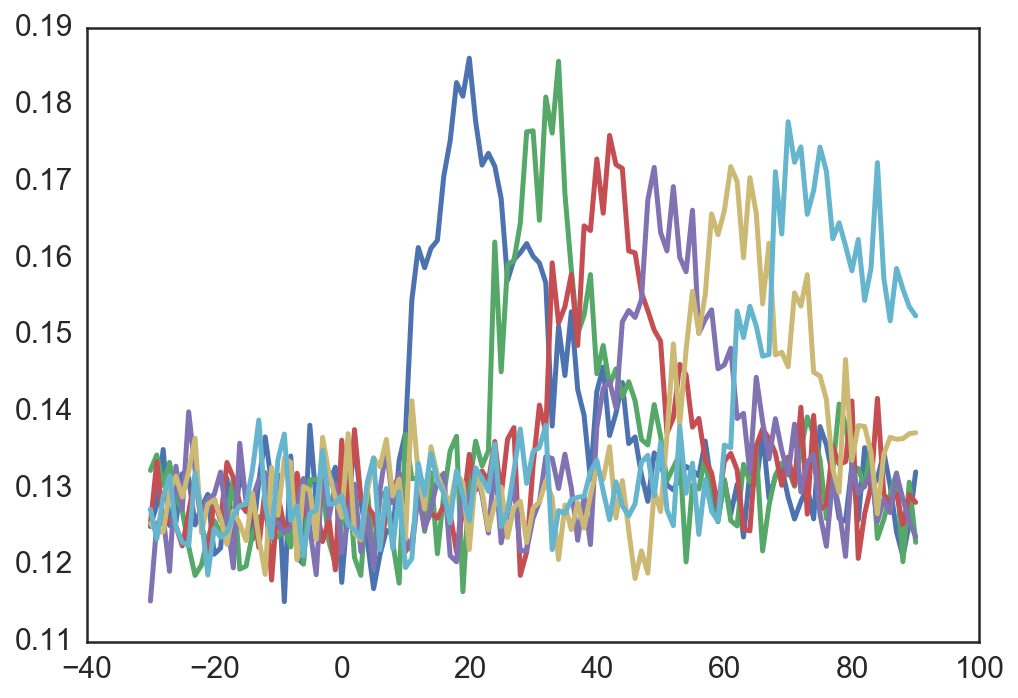

In [67]:
y_noprecue_pic1 = a_pic1.diagonal()
y_noprecue_pic2 = a_pic2.diagonal()
y_noprecue_pic3 = a_pic3.diagonal()
y_noprecue_pic4 = a_pic4.diagonal()
y_noprecue_pic5 = a_pic5.diagonal()
y_noprecue_pic6 = a_pic6.diagonal()







plt.figure()
plt.errorbar(x=np.array(range(-30,91)),y=y_noprecue_pic1)#, yerr=err_pic1.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_noprecue_pic2)#, yerr=err_pic2.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_noprecue_pic3)#, yerr=err_pic3.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_noprecue_pic4)#, yerr=err_pic4.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_noprecue_pic5)#, yerr=err_pic5.diagonal())
plt.errorbar(x=np.array(range(-30,91)),y=y_noprecue_pic6)#, yerr=err_pic6.diagonal())








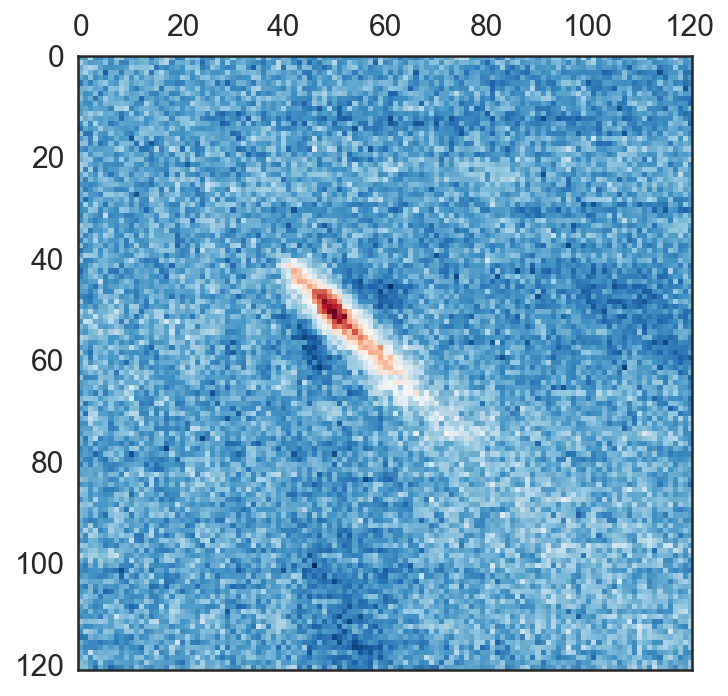

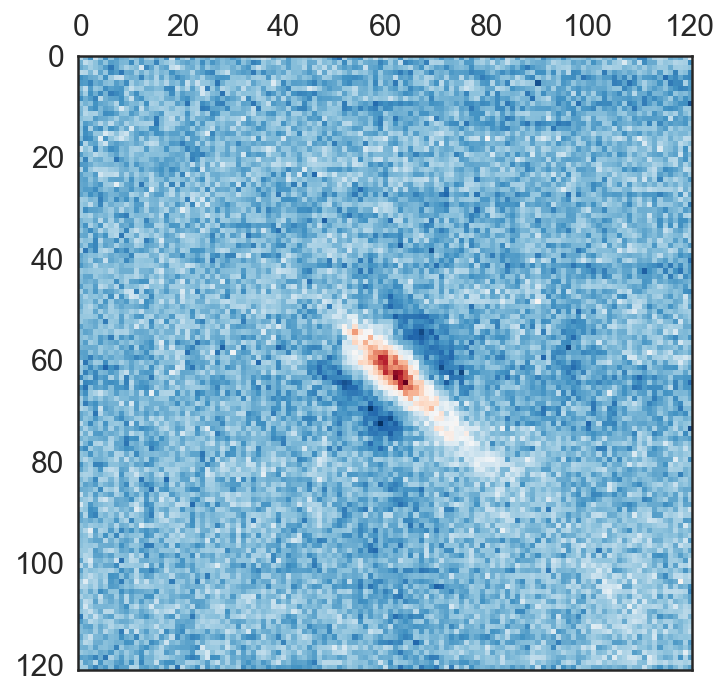

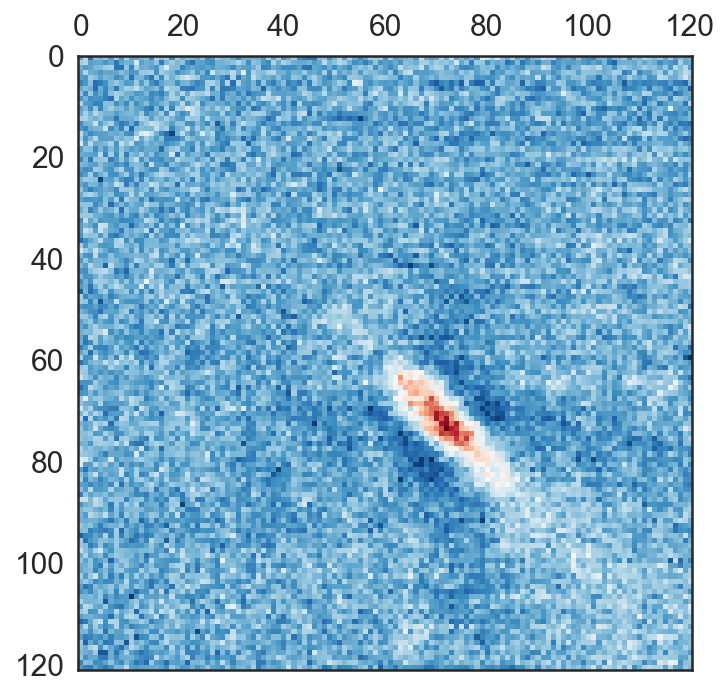

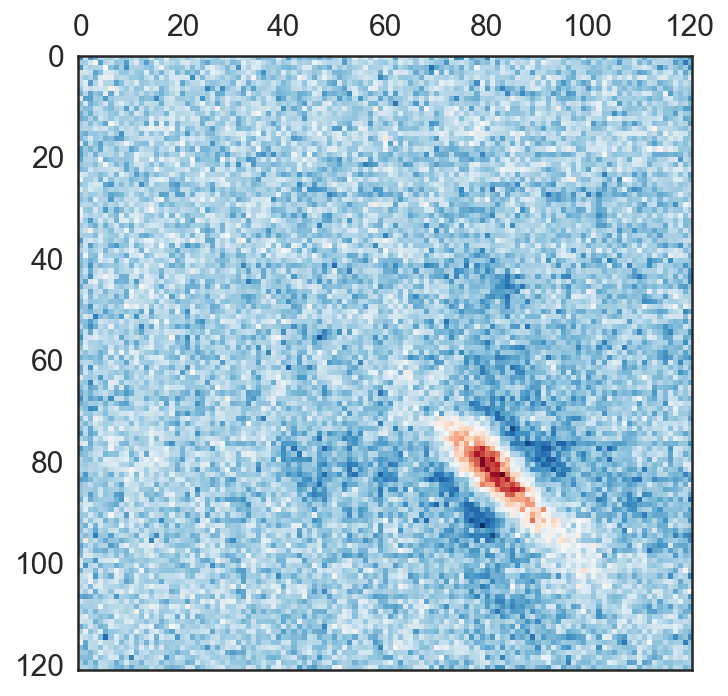

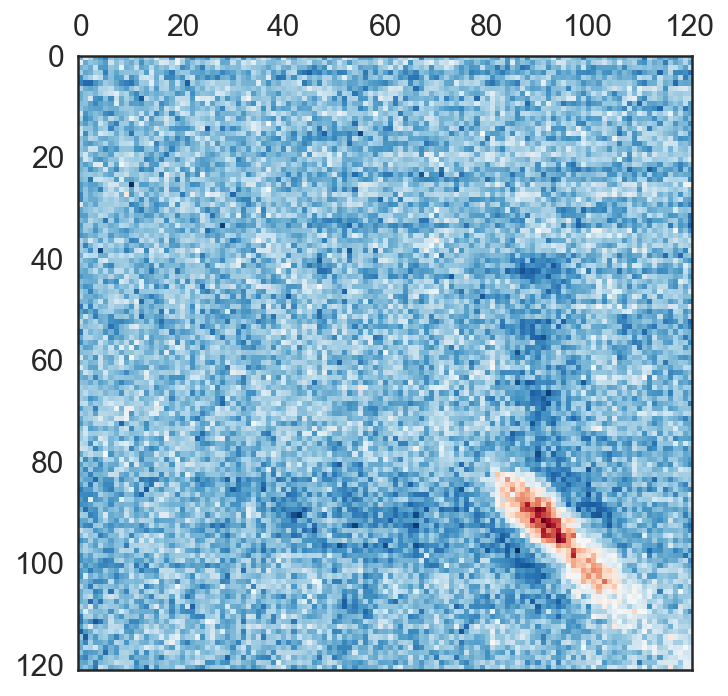

In [68]:

p = plt.matshow(a_pic1,cmap='RdBu_r')
p = plt.matshow(a_pic2,cmap='RdBu_r')
p = plt.matshow(a_pic3,cmap='RdBu_r')
p = plt.matshow(a_pic4,cmap='RdBu_r')
p = plt.matshow(a_pic5,cmap='RdBu_r')
#p = plt.matshow(a_pic6,cmap='RdBu_r')


#p.set_clim(vmin=.125, vmax=None)

In [69]:
differences = []
for timepoint in range(len(a_pic3)):
    noprecue = np.array([item.diagonal()[timepoint] for item in noprecue_pic5_array_list])
    precue = np.array([item.diagonal()[timepoint] for item in precue_pic5_array_list])
    difference = precue-noprecue
    differences.append(difference)
    
    output = stats.ttest_rel(noprecue,precue)
    if 0< timepoint < 25:
        print timepoint, output.pvalue

1 0.697537239746
2 0.872357447416
3 0.815863128813
4 0.677236424784
5 0.361103166396
6 0.0320996510876
7 0.16085610396
8 0.873599099343
9 0.217211465515
10 0.0812060814313
11 0.979372351435
12 0.645791127648
13 0.358681563497
14 0.174236442711
15 0.774247283242
16 0.740894000478
17 0.957184568594
18 0.0397379700485
19 0.874360382955
20 0.75653564442
21 0.453338469742
22 0.198489788862
23 0.940752815239
24 0.390496917636


In [70]:
a = np.average(differences, axis=1)
err = stats.sem(differences, axis=1)

<Container object of 3 artists>

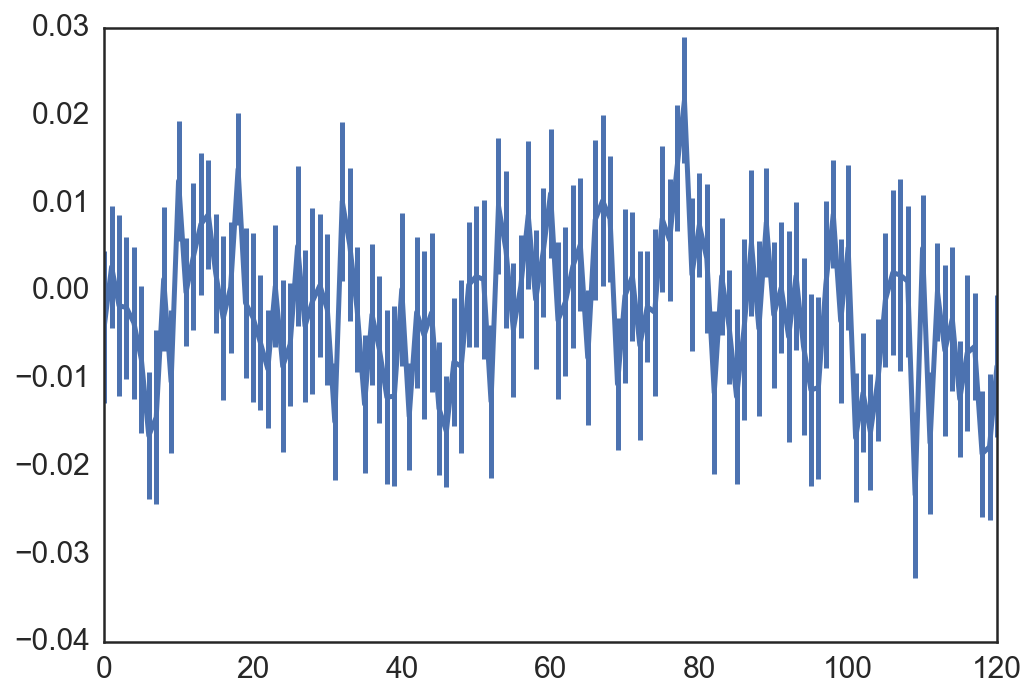

In [71]:
plt.figure()
plt.errorbar(x=np.array(range(len(a))),y=a, yerr=err)

In [72]:
before = 8
after =  8

#when done for each individual subject
precue_target = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_array_list])
noprecue_target = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_array_list])

#don't take mean over the before to after interval
precue_target_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in precue_array_list])
noprecue_target_interval = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after] for item in noprecue_array_list])




#when done for best timepoint across subjects
precue_target = np.array([item.diagonal()[y_precue.argmax()-before:y_precue.argmax()+after].mean() for item in precue_array_list])
noprecue_target = np.array([item.diagonal()[y_noprecue.argmax()-before:y_noprecue.argmax()+after].mean() for item in noprecue_array_list])

#don't take mean over the before to after interval
precue_target_interval = np.array([item.diagonal()[y_precue.argmax()-before:y_precue.argmax()+after] for item in precue_array_list])
noprecue_target_interval = np.array([item.diagonal()[y_noprecue.argmax()-before:y_noprecue.argmax()+after] for item in noprecue_array_list])



#when done for best timepoint across subjects
precue_target = np.array([item.diagonal()[y_precue[0:50].argmax()-before:y_precue.argmax()+after].mean() for item in precue_array_list])
noprecue_target = np.array([item.diagonal()[y_noprecue[0:50].argmax()-before:y_noprecue.argmax()+after].mean() for item in noprecue_array_list])

#don't take mean over the before to after interval
precue_target_interval = np.array([item.diagonal()[y_precue[0:50].argmax()-before:y_precue.argmax()+after] for item in precue_array_list])
noprecue_target_interval = np.array([item.diagonal()[y_noprecue[0:50].argmax()-before:y_noprecue.argmax()+after] for item in noprecue_array_list])







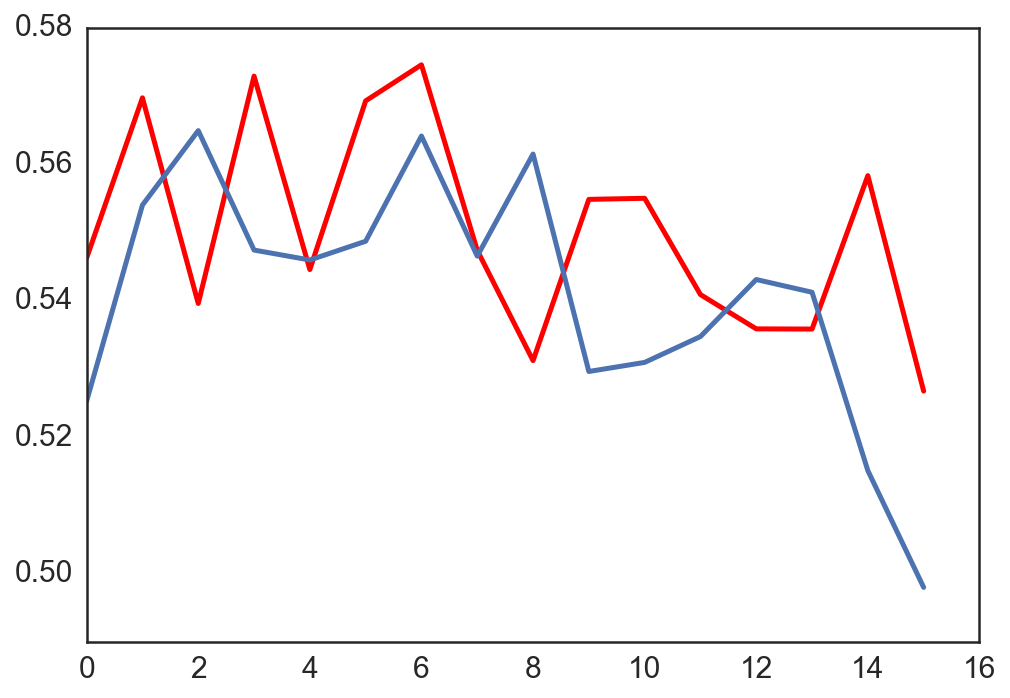

In [73]:
plt.plot(np.mean(precue_target_interval,axis=0),color="red")
plt.plot(np.mean(noprecue_target_interval,axis=0))

In [74]:
print precue_target
print noprecue_target

[ 0.53526042  0.54285714  0.54881944  0.53018791  0.53520833  0.61016646
  0.5482712   0.65978436  0.55833333  0.49243056  0.529375    0.49528509
  0.54708333  0.58986111  0.57111111  0.57048611  0.49941964  0.59416667
  0.51791667  0.50895833  0.57762792  0.53909722  0.53538377  0.56729167]
[ 0.5491299   0.52868304  0.53943713  0.54821429  0.52548611  0.53002451
  0.54548611  0.58486111  0.55208333  0.51083333  0.53840278  0.50984284
  0.56284722  0.57215278  0.50380482  0.56597222  0.48731399  0.61131944
  0.53041667  0.52888889  0.58319444  0.50840278  0.54944444  0.51027778]


In [75]:
stats.ttest_rel(precue_target,noprecue_target)

Ttest_relResult(statistic=1.5045629879158817, pvalue=0.14604610047998934)

In [76]:
diff_targ = precue_target - noprecue_target

## Distractor Analysis

In [77]:
before = 8
after =  8

#when done for each individual subject
precue_pic1 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic1_array_list])
precue_pic2 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic2_array_list])
precue_pic3 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic3_array_list])
precue_pic4 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic4_array_list])
precue_pic5 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic5_array_list])
precue_pic6 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in precue_pic6_array_list])

#when done for best timepoint across subjects
precue_pic1 = np.array([item.diagonal()[y_precue_pic1.argmax()-before:y_precue_pic1.argmax()+after].mean() for item in precue_pic1_array_list])
precue_pic2 = np.array([item.diagonal()[y_precue_pic2.argmax()-before:y_precue_pic2.argmax()+after].mean() for item in precue_pic2_array_list])
precue_pic3 = np.array([item.diagonal()[y_precue_pic3.argmax()-before:y_precue_pic3.argmax()+after].mean() for item in precue_pic3_array_list])
precue_pic4 = np.array([item.diagonal()[y_precue_pic4.argmax()-before:y_precue_pic4.argmax()+after].mean() for item in precue_pic4_array_list])
precue_pic5 = np.array([item.diagonal()[y_precue_pic5.argmax()-before:y_precue_pic5.argmax()+after].mean() for item in precue_pic5_array_list])
precue_pic6 = np.array([item.diagonal()[y_precue_pic6.argmax()-before:y_precue_pic6.argmax()+after].mean() for item in precue_pic6_array_list])

precue_pic1_interval = np.array([item.diagonal()[y_precue_pic1.argmax()-before:y_precue_pic1.argmax()+after] for item in precue_pic1_array_list])
precue_pic2_interval = np.array([item.diagonal()[y_precue_pic2.argmax()-before:y_precue_pic2.argmax()+after] for item in precue_pic2_array_list])
precue_pic3_interval = np.array([item.diagonal()[y_precue_pic3.argmax()-before:y_precue_pic3.argmax()+after] for item in precue_pic3_array_list])
precue_pic4_interval = np.array([item.diagonal()[y_precue_pic4.argmax()-before:y_precue_pic4.argmax()+after] for item in precue_pic4_array_list])
precue_pic5_interval = np.array([item.diagonal()[y_precue_pic5.argmax()-before:y_precue_pic5.argmax()+after] for item in precue_pic5_array_list])
precue_pic6_interval = np.array([item.diagonal()[y_precue_pic6.argmax()-before:y_precue_pic6.argmax()+after] for item in precue_pic6_array_list])



#when done for each individual subject
noprecue_pic1 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic1_array_list])
noprecue_pic2 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic2_array_list])
noprecue_pic3 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic3_array_list])
noprecue_pic4 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic4_array_list])
noprecue_pic5 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic5_array_list])
noprecue_pic6 = np.array([item.diagonal()[item.diagonal().argmax()-before:item.diagonal().argmax()+after].mean() for item in noprecue_pic6_array_list])

#when done for best timepoint across subjects
noprecue_pic1 = np.array([item.diagonal()[y_noprecue_pic1.argmax()-before:y_noprecue_pic1.argmax()+after].mean() for item in noprecue_pic1_array_list])
noprecue_pic2 = np.array([item.diagonal()[y_noprecue_pic2.argmax()-before:y_noprecue_pic2.argmax()+after].mean() for item in noprecue_pic2_array_list])
noprecue_pic3 = np.array([item.diagonal()[y_noprecue_pic3.argmax()-before:y_noprecue_pic3.argmax()+after].mean() for item in noprecue_pic3_array_list])
noprecue_pic4 = np.array([item.diagonal()[y_noprecue_pic4.argmax()-before:y_noprecue_pic4.argmax()+after].mean() for item in noprecue_pic4_array_list])
noprecue_pic5 = np.array([item.diagonal()[y_noprecue_pic5.argmax()-before:y_noprecue_pic5.argmax()+after].mean() for item in noprecue_pic5_array_list])
noprecue_pic6 = np.array([item.diagonal()[y_noprecue_pic6.argmax()-before:y_noprecue_pic6.argmax()+after].mean() for item in noprecue_pic6_array_list])

noprecue_pic1_interval = np.array([item.diagonal()[y_noprecue_pic1.argmax()-before:y_noprecue_pic1.argmax()+after] for item in noprecue_pic1_array_list])
noprecue_pic2_interval = np.array([item.diagonal()[y_noprecue_pic2.argmax()-before:y_noprecue_pic2.argmax()+after] for item in noprecue_pic2_array_list])
noprecue_pic3_interval = np.array([item.diagonal()[y_noprecue_pic3.argmax()-before:y_noprecue_pic3.argmax()+after] for item in noprecue_pic3_array_list])
noprecue_pic4_interval = np.array([item.diagonal()[y_noprecue_pic4.argmax()-before:y_noprecue_pic4.argmax()+after] for item in noprecue_pic4_array_list])
noprecue_pic5_interval = np.array([item.diagonal()[y_noprecue_pic5.argmax()-before:y_noprecue_pic5.argmax()+after] for item in noprecue_pic5_array_list])
noprecue_pic6_interval = np.array([item.diagonal()[y_noprecue_pic6.argmax()-before:y_noprecue_pic6.argmax()+after] for item in noprecue_pic6_array_list])







In [78]:
noprecue_pic2.shape

(23,)

In [79]:
precue_allpics = np.mean([precue_pic2,precue_pic3,precue_pic4,precue_pic5,precue_pic6],axis=0) #average across pictures so you have number per subject
noprecue_allpics = np.mean([noprecue_pic2,noprecue_pic3,noprecue_pic4,noprecue_pic5,noprecue_pic6],axis=0)

#average across pictures so you have interval persubject
precue_allpics_interval = np.mean([precue_pic2_interval,precue_pic3_interval,precue_pic4_interval,precue_pic5_interval,precue_pic6_interval],axis=0)
noprecue_allpics_interval = np.mean([noprecue_pic2_interval,noprecue_pic3_interval,noprecue_pic4_interval,noprecue_pic5_interval,noprecue_pic6_interval],axis=0)

In [80]:
noprecue_pic6_interval.shape

(23, 16)

In [81]:
allpics_interval_z = stats.zscore(np.append(precue_allpics_interval,noprecue_allpics_interval,axis=0))
target_interval_z = stats.zscore(np.append(precue_target_interval,noprecue_target_interval,axis=0))





In [82]:
precue_allpics_interval_z = allpics_interval_z[:precue_allpics_interval.shape[0]]
noprecue_allpics_interval_z = allpics_interval_z[precue_allpics_interval.shape[0]:]

precue_target_interval_z = target_interval_z[:precue_target_interval.shape[0]]
noprecue_target_interval_z = target_interval_z[precue_target_interval.shape[0]:]

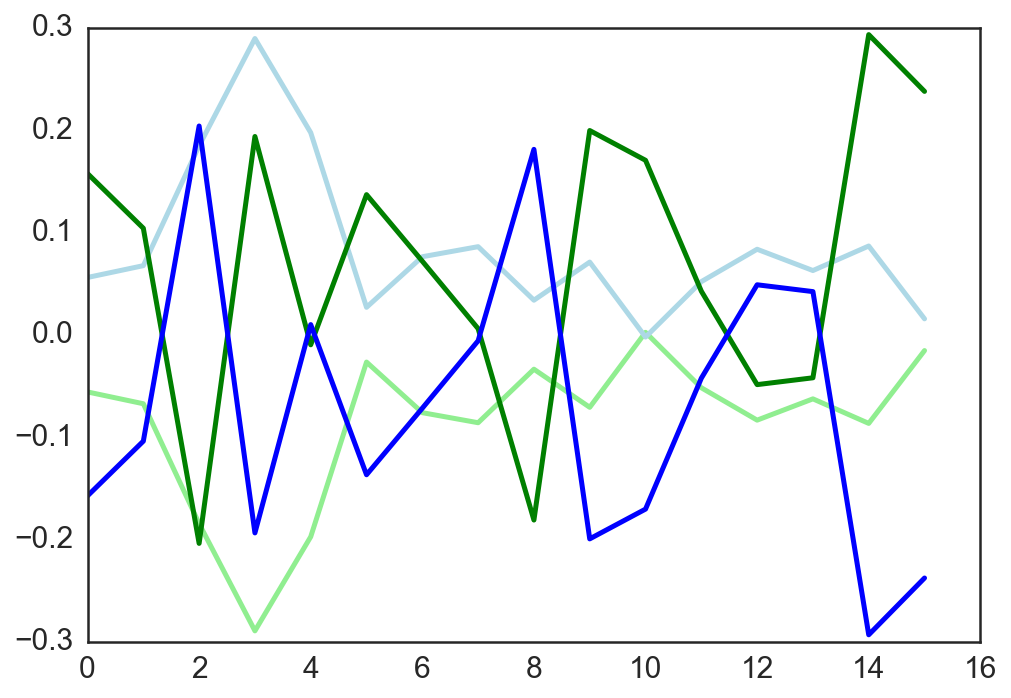

In [83]:
# plt.plot(np.mean(precue_allpics_interval,axis=0),color='lightgreen')
# plt.plot(np.mean(noprecue_allpics_interval,axis=0),color='lightblue')
# plt.plot(np.mean(precue_target_interval,axis=0),color='green')
# plt.plot(np.mean(noprecue_target_interval,axis=0),color='blue')

plt.plot(np.mean(precue_allpics_interval_z,axis=0),color='lightgreen')
plt.plot(np.mean(noprecue_allpics_interval_z,axis=0),color='lightblue')
plt.plot(np.mean(precue_target_interval_z,axis=0),color='green')
plt.plot(np.mean(noprecue_target_interval_z,axis=0),color='blue')


#stats.zscore(d)
# plt.plot(np.mean(noprecue_pic5_interval,axis=0))
# plt.plot(np.mean(noprecue_target_interval,axis=0))




In [84]:
print precue_allpics
print noprecue_allpics

[ 0.1513999   0.15568659  0.1430217   0.14840755  0.17222702  0.15416394
  0.18229021  0.17445542  0.16206594  0.15333488  0.14289646  0.15474806
  0.18746738  0.16170651  0.16353252  0.14529645  0.1837357   0.13683394
  0.14905641  0.15660561  0.13599076  0.14824976  0.15361016]
[ 0.14559368  0.16152662  0.14721307  0.14293788  0.17608791  0.16163363
  0.18655347  0.18967936  0.15943331  0.17001161  0.15524628  0.15785651
  0.19211447  0.15364975  0.17317294  0.14383486  0.18316153  0.13745608
  0.14558214  0.16806359  0.1390173   0.14896936  0.15795203]


In [85]:
stats.ttest_rel(precue_allpics,noprecue_allpics)

Ttest_relResult(statistic=-2.5249795102266077, pvalue=0.019283905323133843)

In [86]:
noprecue_target

array([ 0.5491299 ,  0.52868304,  0.53943713,  0.54821429,  0.52548611,
        0.53002451,  0.54548611,  0.58486111,  0.55208333,  0.51083333,
        0.53840278,  0.50984284,  0.56284722,  0.57215278,  0.50380482,
        0.56597222,  0.48731399,  0.61131944,  0.53041667,  0.52888889,
        0.58319444,  0.50840278,  0.54944444,  0.51027778])

In [87]:
noprecue_allpics

array([ 0.14559368,  0.16152662,  0.14721307,  0.14293788,  0.17608791,
        0.16163363,  0.18655347,  0.18967936,  0.15943331,  0.17001161,
        0.15524628,  0.15785651,  0.19211447,  0.15364975,  0.17317294,
        0.14383486,  0.18316153,  0.13745608,  0.14558214,  0.16806359,
        0.1390173 ,  0.14896936,  0.15795203])

In [88]:
stats.ttest_rel(noprecue_target,noprecue_allpics)

ValueError: unequal length arrays

In [89]:
stats.ttest_rel(precue_target,precue_allpics)

ValueError: unequal length arrays

In [90]:
diff_dist = precue_allpics - noprecue_allpics

In [91]:
stats.ttest_rel(diff_targ,diff_dist)

ValueError: unequal length arrays

In [92]:
def formatMyEffect(in_df,DV,in_list):
    g = in_df.groupby(in_list)
    a = g[DV].mean()
    a = a.reset_index()
    
    CIs = withinSubCIs(a,DV)
    print "CIs:",' '.join([str(item) for item in CIs])
    
    ## Get condtion means
    in_list = [item for item in in_list if item != 'subject']
        
    c = a.groupby(in_list)
    m = c[DV].mean()
    a_test = m
    
    return a_test, CIs

In [93]:
def withinSubCIs(a,DV):

    ## Get subject average
    by_sub = a.groupby('subject')[DV].mean().reset_index()
    
    ## Get group grand mean
    group_mean = by_sub[DV].mean()
    
    ## Rename sub average of DV
    by_sub = by_sub.rename(columns={DV:'subAvg'})

    ## Create DF with normalized DV values
    j = a.merge(by_sub,on='subject')
    j['groupAvg'] = group_mean
    j['DV_norm'] = j[DV] - j.subAvg + j.groupAvg
    
    ## Find IVs from input DF
    IVs = [item for item in list(j.columns) if item not in ['subject','subAvg','groupAvg','DV_norm',DV]]

    ## Group DF across subjects by IVs to get standard deviation by condition
    conditions_norm = j.groupby(IVs)['DV_norm'].std().reset_index()

    ## Find SE, Morey (2008) correction and t-value, and CIs
    conditions_norm['se'] = conditions_norm.DV_norm/np.sqrt(by_sub.shape[0])
    conditions_norm['correction'] = np.sqrt(float(conditions_norm.shape[0])/(float(conditions_norm.shape[0]) - 1))
    conditions_norm['t_val'] = stats.t.ppf(1 - 0.025, by_sub.shape[0] -1)
    conditions_norm['CI'] = conditions_norm.se*conditions_norm.t_val*conditions_norm.correction
    
    return list(conditions_norm['CI'])

In [94]:
noprecue = np.array([item.diagonal() for item in noprecue_pic6_array_list])
precue = np.array([item.diagonal() for item in precue_pic6_array_list])

In [115]:
noprecue = np.array([item.diagonal() for item in noprecue_array_list])
precue = np.array([item.diagonal() for item in precue_array_list])

In [116]:
noprecue = pd.DataFrame(noprecue)
precue = pd.DataFrame(precue)

In [117]:
noprecue['subject'] = subject_list
precue['subject'] = subject_list
noprecue['cue_type'] = 'noprecue'
precue['cue_type'] = 'precue'


In [118]:
df = pd.concat([precue, noprecue])

In [119]:
df_list = pd.melt(df,id_vars=['subject','cue_type'])

In [120]:
k = df_list.groupby(['subject','variable','cue_type'])
k = k['value'].mean().reset_index()

#k['variable'] = k.variable*.01

pvals = []
for timepoint in df_list.variable.unique():
    resp_precue = k[(k.variable == timepoint) & (k.cue_type == 'precue')].value
    resp_noprecue = k[(k.variable == timepoint) & (k.cue_type == 'noprecue')].value

    # Perform one-sample t-test using scipy stats
    tval, pval = stats.ttest_rel(resp_precue,resp_noprecue)
    d = np.abs(np.round((resp_precue.values-resp_noprecue.values).mean()/(resp_precue.values-resp_noprecue.values).std(),3))
    
    entry = {'timepoint':timepoint,'pval':pval,'tval':tval,'d':d}
    pvals.append(entry)

pvals = pd.DataFrame(pvals)

In [121]:
pvals.loc[pvals.pval < 1, 'size'] = 0
pvals.loc[pvals.pval < 0.05, 'size'] = 75
pvals.loc[pvals.pval < 0.01, 'size'] = 75
pvals.loc[pvals.pval < 0.001, 'size'] = 75

pvals.loc[pvals.pval < 1, 'color'] = 'white'
pvals.loc[pvals.pval < 0.05, 'color'] = 'yellow'
pvals.loc[pvals.pval < 0.01, 'color'] = 'orange'
pvals.loc[pvals.pval < 0.001, 'color'] = 'red'

pvals.loc[pvals.pval < 1, 'alpha'] = 0
pvals.loc[pvals.pval < 0.05, 'alpha'] = .7
pvals.loc[pvals.pval < 0.01, 'alpha'] = .7
pvals.loc[pvals.pval < 0.001, 'alpha'] = .7

In [122]:
CIs_all = []
dataVar = 'value'
for timepoint in k.variable.unique():
    b, CIs = formatMyEffect(k[k.variable == timepoint],dataVar,['subject','cue_type'])
    CIs_all.append(CIs)
CIs_all = [item[1] for item in CIs_all]



CIs: 0.0139965253509 0.0139965253509
CIs: 0.0169648917773 0.0169648917773
CIs: 0.0168319463786 0.0168319463786
CIs: 0.0170837134486 0.0170837134486
CIs: 0.0169607267537 0.0169607267537
CIs: 0.0169154685724 0.0169154685724
CIs: 0.0193433860426 0.0193433860426
CIs: 0.0145674872374 0.0145674872374
CIs: 0.0139397871466 0.0139397871466
CIs: 0.0156153368995 0.0156153368995
CIs: 0.0120926483911 0.0120926483911
CIs: 0.0173519553176 0.0173519553176
CIs: 0.0147108027042 0.0147108027042
CIs: 0.0154138899758 0.0154138899758
CIs: 0.0119300165642 0.0119300165642
CIs: 0.0213462784152 0.0213462784152
CIs: 0.0155322323968 0.0155322323968
CIs: 0.0224470104195 0.0224470104195
CIs: 0.0181710015751 0.0181710015751
CIs: 0.0134824269974 0.0134824269974
CIs: 0.0202805326753 0.0202805326753
CIs: 0.0180264073741 0.0180264073741
CIs: 0.0168532710716 0.0168532710716
CIs: 0.0162925166254 0.0162925166254
CIs: 0.0181830104517 0.0181830104517
CIs: 0.014874376178 0.014874376178
CIs: 0.0166748898722 0.0166748898722
CIs

In [123]:
data1 = k[k.cue_type == 'precue'].groupby('variable')['value'].mean().reset_index()
data2 = k[k.cue_type == 'noprecue'].groupby('variable')['value'].mean().reset_index()
data1['CI'] = CIs_all
data1['value2'] = data2['value']

data1['pval'] = pvals['pval']
data1['alpha'] = pvals['alpha']
data1['size'] = pvals['size']
data1['color'] = pvals['color']



In [124]:
data1.head()

variable     value        CI    value2      pval  alpha  size  color
0         0  0.124503  0.013997  0.133266  0.369312    0.0   0.0  white
1         1  0.132899  0.016965  0.125442  0.526591    0.0   0.0  white
2         2  0.128416  0.016832  0.128635  0.984941    0.0   0.0  white
3         3  0.128742  0.017084  0.134045  0.654059    0.0   0.0  white
4         4  0.124852  0.016961  0.122990  0.873812    0.0   0.0  white

[]

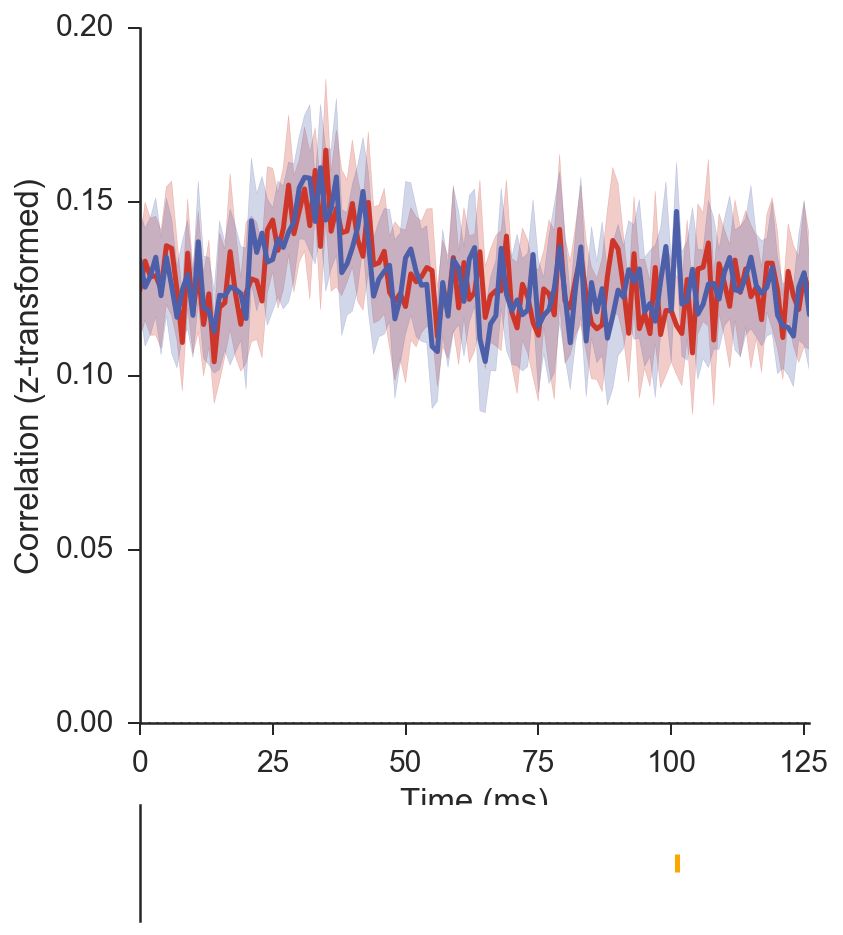

In [126]:
fig = plt.figure(figsize=(6, 8)) #dddddd
sns.set_style("ticks")


#sns.set(font='Helvetica')
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 1]) 

ax1 = plt.subplot(gs[0])

ax1.axhline(y=0, ls=":", c=".1",lw=1.3)
ax1.axvline(x=0, ls="-", c=".7",lw=1.5)

plt.errorbar("variable", "value",color='#CE3629',data=data1)
#plt.errorbar("time", "pred_Vs_rVal", "CI", color='#CE3629', lw=1.85, alpha=.25, data=data1)
plt.fill_between(data1.variable, data1.value + data1.CI, data1.value-data1.CI,color='#CE3629',alpha=.25 )

plt.errorbar("variable", "value2",color='#4D5FA9',data=data1)
#plt.errorbar("time", "pred_Vs_rVal2", "CI",color='#4D5FA9',lw=1.85, alpha=.25,data=data1)
plt.fill_between(data1.variable, data1.value2 + data1.CI, data1.value2-data1.CI,color='#4D5FA9',alpha=.25 )

sns.despine(bottom=False)

#ax1.set_xlim([-200.01,500.1])
ax1.set_xlim([0,126])
#ax1.set_ylim([.40,.65])




# if analysis == "withinStim":
#     ax1.set_ylim([-.1,.7001])    
# elif analysis == "betweenStim":
#     ax1.set_ylim([-.1,.5001])    

#set axis tick labels
#ax1.xaxis.set_ticks(np.arange(-200, 501, 100))
ax1.xaxis.set_ticks(np.arange(0, 126, 25))



ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Correlation (z-transformed)')

    
ax2 = plt.subplot(gs[1])

for x, y, a, s, c in zip(pvals.timepoint, [1]*125, pvals['alpha'], pvals['size'], pvals['color'] ):
   ax2.scatter(x, y, color = c ,alpha = 1, s=s, lw=2.5, marker='|',edgecolors='DarkGray')  

ax2.set_xlim([0,126])
ax2.set_ylim([0.99,1.01])

#ax2.set_facecolor('none')

sns.despine(bottom=True,ax=ax2)

plt.setp(ax2.axes, yticks=[])
plt.setp(ax2.axes, xticks=[])

# plt.savefig("betwenStim_diff_vs_same.svg")

